## Module 1: Basic Libraries

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

## Module 2: Dataset Description

In [454]:
data = pd.read_csv("Obesity_Dataset.csv")
data.head(10)

GD    AG    HT    WT   FH   FF   FV   NM         CM   SK   CW   CC  \
0  Female  21.0  1.62  64.0  yes   no  2.0  3.0  Sometimes   no  2.0   no   
1  Female  21.0  1.52  56.0  yes   no  3.0  3.0  Sometimes  yes  3.0  yes   
2    Male  23.0  1.80  77.0  yes   no  2.0  3.0  Sometimes   no  2.0   no   
3    Male  27.0  1.80  87.0   no   no  3.0  3.0  Sometimes   no  2.0   no   
4    Male  22.0  1.78  89.8   no   no  2.0  1.0  Sometimes   no  2.0   no   
5    Male  29.0  1.62  53.0   no  yes  2.0  3.0  Sometimes   no  2.0   no   
6  Female  23.0  1.50  55.0  yes  yes  3.0  3.0  Sometimes   no  2.0   no   
7    Male  22.0  1.64  53.0   no   no  2.0  3.0  Sometimes   no  2.0   no   
8    Male  24.0  1.78  64.0  yes  yes  3.0  3.0  Sometimes   no  2.0   no   
9    Male  22.0  1.72  68.0  yes  yes  2.0  3.0  Sometimes   no  2.0   no   

    FA   TD          CA                     TU                   OB  
0  0.0  1.0          no  Public_Transportation        Normal_Weight  
1  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight  
2  2.0  1.0  Frequently  Public_Transportation        Normal_Weight  
3  2.0  0.0  Frequently                Walking   Overweight_Level_I  
4  0.0  0.0   Sometimes  Public_Transportation  Overweight_Level_II  
5  0.0  0.0   Sometimes             Automobile        Normal_Weight  
6  1.0  0.0   Sometimes              Motorbike        Normal_Weight  
7  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight  
8  1.0  1.0  Frequently  Public_Transportation        Normal_Weight  
9  1.0  1.0          no  Public_Transportation        Normal_Weight

In [455]:
data.tail()

GD         AG        HT          WT   FH   FF   FV   NM         CM  \
2106  Female  20.976842  1.710730  131.408528  yes  yes  3.0  3.0  Sometimes   
2107  Female  21.982942  1.748584  133.742943  yes  yes  3.0  3.0  Sometimes   
2108  Female  22.524036  1.752206  133.689352  yes  yes  3.0  3.0  Sometimes   
2109  Female  24.361936  1.739450  133.346641  yes  yes  3.0  3.0  Sometimes   
2110  Female  23.664709  1.738836  133.472641  yes  yes  3.0  3.0  Sometimes   

      SK        CW  CC        FA        TD         CA                     TU  \
2106  no  1.728139  no  1.676269  0.906247  Sometimes  Public_Transportation   
2107  no  2.005130  no  1.341390  0.599270  Sometimes  Public_Transportation   
2108  no  2.054193  no  1.414209  0.646288  Sometimes  Public_Transportation   
2109  no  2.852339  no  1.139107  0.586035  Sometimes  Public_Transportation   
2110  no  2.863513  no  1.026452  0.714137  Sometimes  Public_Transportation   

                    OB  
2106  Obesity_Type_III  
2107  Obesity_Type_III  
2108  Obesity_Type_III  
2109  Obesity_Type_III  
2110  Obesity_Type_III

In [456]:
#Shape of Data
data.shape

(2111, 17)

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GD      2111 non-null   object 
 1   AG      2111 non-null   float64
 2   HT      2111 non-null   float64
 3   WT      2111 non-null   float64
 4   FH      2111 non-null   object 
 5   FF      2111 non-null   object 
 6   FV      2111 non-null   float64
 7   NM      2111 non-null   float64
 8   CM      2111 non-null   object 
 9   SK      2111 non-null   object 
 10  CW      2111 non-null   float64
 11  CC      2111 non-null   object 
 12  FA      2111 non-null   float64
 13  TD      2111 non-null   float64
 14  CA      2111 non-null   object 
 15  TU      2111 non-null   object 
 16  OB      2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [458]:
#lets describe the data
data.describe()

AG           HT           WT           FV           NM  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

                CW           FA           TD  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [459]:
data.count()

GD    2111
AG    2111
HT    2111
WT    2111
FH    2111
FF    2111
FV    2111
NM    2111
CM    2111
SK    2111
CW    2111
CC    2111
FA    2111
TD    2111
CA    2111
TU    2111
OB    2111
dtype: int64

In [460]:
data.isnull().sum()

GD    0
AG    0
HT    0
WT    0
FH    0
FF    0
FV    0
NM    0
CM    0
SK    0
CW    0
CC    0
FA    0
TD    0
CA    0
TU    0
OB    0
dtype: int64

In [461]:
data['OB'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: OB, dtype: int64

## Label Encoding

In [462]:
label_encoder = preprocessing.LabelEncoder()
data['GD']= label_encoder.fit_transform(data['GD'])

data['GD'].unique()

array([0, 1])

In [463]:
label_encoder = preprocessing.LabelEncoder()
data['FH']= label_encoder.fit_transform(data['FH'])

data['FH'].unique()

array([1, 0])

In [464]:
label_encoder = preprocessing.LabelEncoder()
data['FF']= label_encoder.fit_transform(data['FF'])

data['FF'].unique()

array([0, 1])

In [465]:
label_encoder = preprocessing.LabelEncoder()
data['CM']= label_encoder.fit_transform(data['CM'])

data['CM'].unique()

array([2, 1, 0, 3])

In [466]:
label_encoder = preprocessing.LabelEncoder()
data['SK']= label_encoder.fit_transform(data['SK'])

data['SK'].unique()

array([0, 1])

In [467]:
label_encoder = preprocessing.LabelEncoder()
data['CC']= label_encoder.fit_transform(data['CC'])

data['CC'].unique()

array([0, 1])

In [468]:
label_encoder = preprocessing.LabelEncoder()
data['CA']= label_encoder.fit_transform(data['CA'])

data['CA'].unique()

array([3, 2, 1, 0])

In [469]:
label_encoder = preprocessing.LabelEncoder()
data['OB']= label_encoder.fit_transform(data['OB'])

data['OB'].unique()

array([1, 5, 6, 2, 0, 3, 4])

In [470]:
label_encoder = preprocessing.LabelEncoder()
data['TU']= label_encoder.fit_transform(data['TU'])

data['TU'].unique()

array([3, 4, 0, 2, 1])

In [471]:
data.describe()

GD           AG           HT           WT           FH  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058     0.817622   
std       0.500083     6.345968     0.093305    26.191172     0.386247   
min       0.000000    14.000000     1.450000    39.000000     0.000000   
25%       0.000000    19.947192     1.630000    65.473343     1.000000   
50%       1.000000    22.777890     1.700499    83.000000     1.000000   
75%       1.000000    26.000000     1.768464   107.430682     1.000000   
max       1.000000    61.000000     1.980000   173.000000     1.000000   

                FF           FV           NM           CM           SK  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.883941     2.419043     2.685628     1.859308     0.020843   
std       0.320371     0.533927     0.778039     0.468543     0.142893   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%       1.000000     2.000000     2.658738     2.000000     0.000000   
50%       1.000000     2.385502     3.000000     2.000000     0.000000   
75%       1.000000     3.000000     3.000000     2.000000     0.000000   
max       1.000000     3.000000     4.000000     3.000000     1.000000   

                CW           CC           FA           TD           CA  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      2.008011     0.045476     1.010298     0.657866     2.268593   
std       0.612953     0.208395     0.850592     0.608927     0.515498   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.584812     0.000000     0.124505     0.000000     2.000000   
50%       2.000000     0.000000     1.000000     0.625350     2.000000   
75%       2.477420     0.000000     1.666678     1.000000     3.000000   
max       3.000000     1.000000     3.000000     2.000000     3.000000   

                TU           OB  
count  2111.000000  2111.000000  
mean      2.365230     3.015632  
std       1.261423     1.952090  
min       0.000000     0.000000  
25%       3.000000     1.000000  
50%       3.000000     3.000000  
75%       3.000000     5.000000  
max       4.000000     6.000000

In [472]:
data.head(10)

GD    AG    HT    WT  FH  FF   FV   NM  CM  SK   CW  CC   FA   TD  CA  TU  \
0   0  21.0  1.62  64.0   1   0  2.0  3.0   2   0  2.0   0  0.0  1.0   3   3   
1   0  21.0  1.52  56.0   1   0  3.0  3.0   2   1  3.0   1  3.0  0.0   2   3   
2   1  23.0  1.80  77.0   1   0  2.0  3.0   2   0  2.0   0  2.0  1.0   1   3   
3   1  27.0  1.80  87.0   0   0  3.0  3.0   2   0  2.0   0  2.0  0.0   1   4   
4   1  22.0  1.78  89.8   0   0  2.0  1.0   2   0  2.0   0  0.0  0.0   2   3   
5   1  29.0  1.62  53.0   0   1  2.0  3.0   2   0  2.0   0  0.0  0.0   2   0   
6   0  23.0  1.50  55.0   1   1  3.0  3.0   2   0  2.0   0  1.0  0.0   2   2   
7   1  22.0  1.64  53.0   0   0  2.0  3.0   2   0  2.0   0  3.0  0.0   2   3   
8   1  24.0  1.78  64.0   1   1  3.0  3.0   2   0  2.0   0  1.0  1.0   1   3   
9   1  22.0  1.72  68.0   1   1  2.0  3.0   2   0  2.0   0  1.0  1.0   3   3   

   OB  
0   1  
1   1  
2   1  
3   5  
4   6  
5   1  
6   1  
7   1  
8   1  
9   1

## Module 3: Exploarory Data Analysis

In [473]:
# sns.pairplot(data)

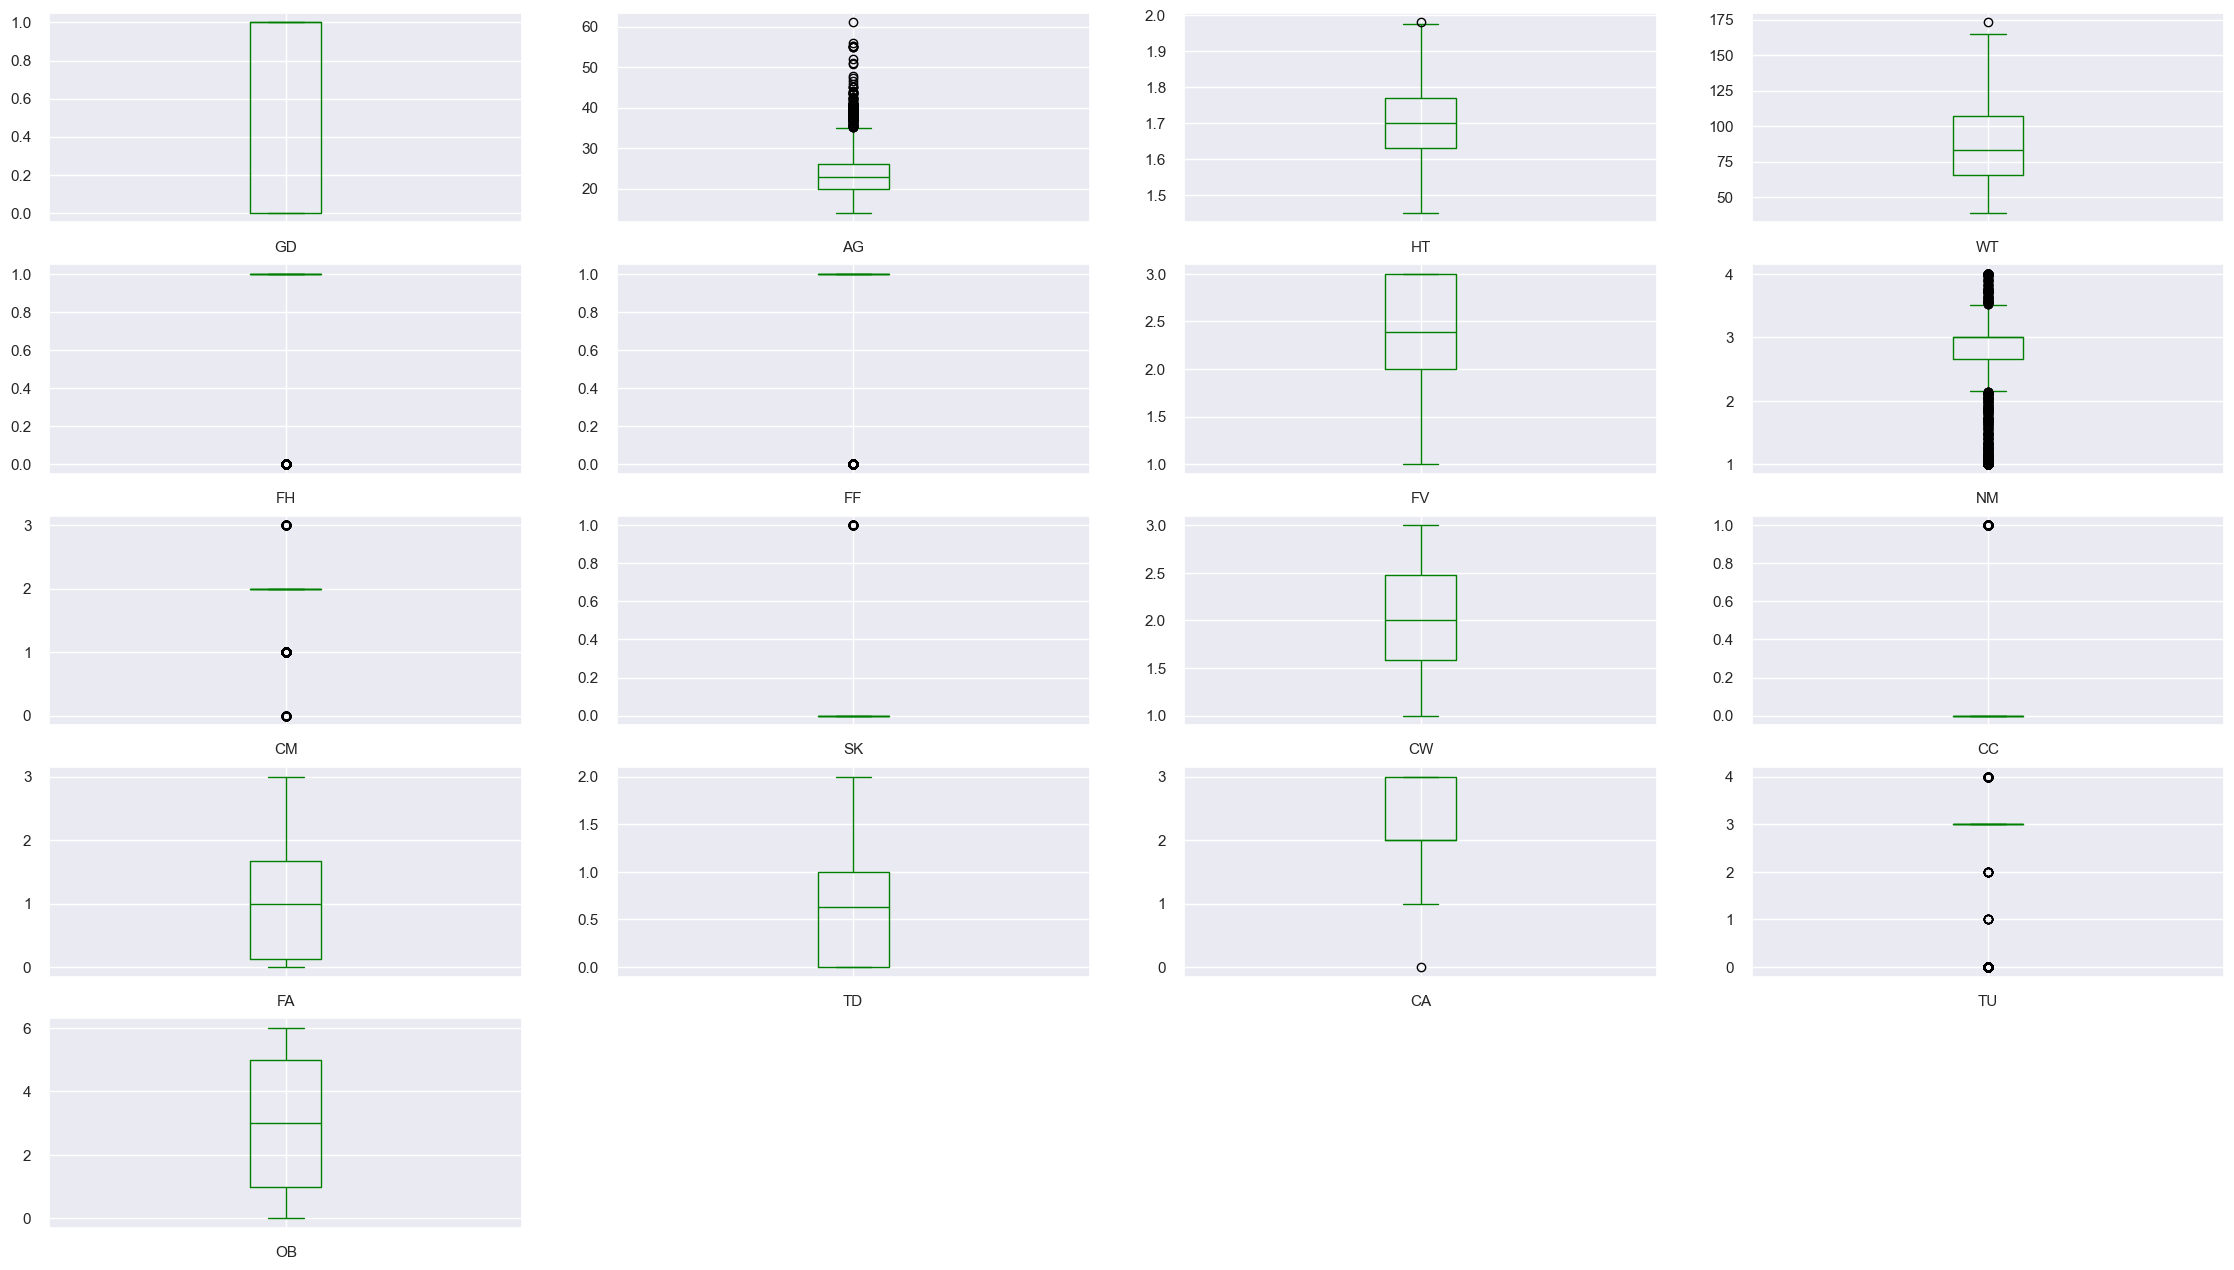

In [474]:
data.plot(color = 'green', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

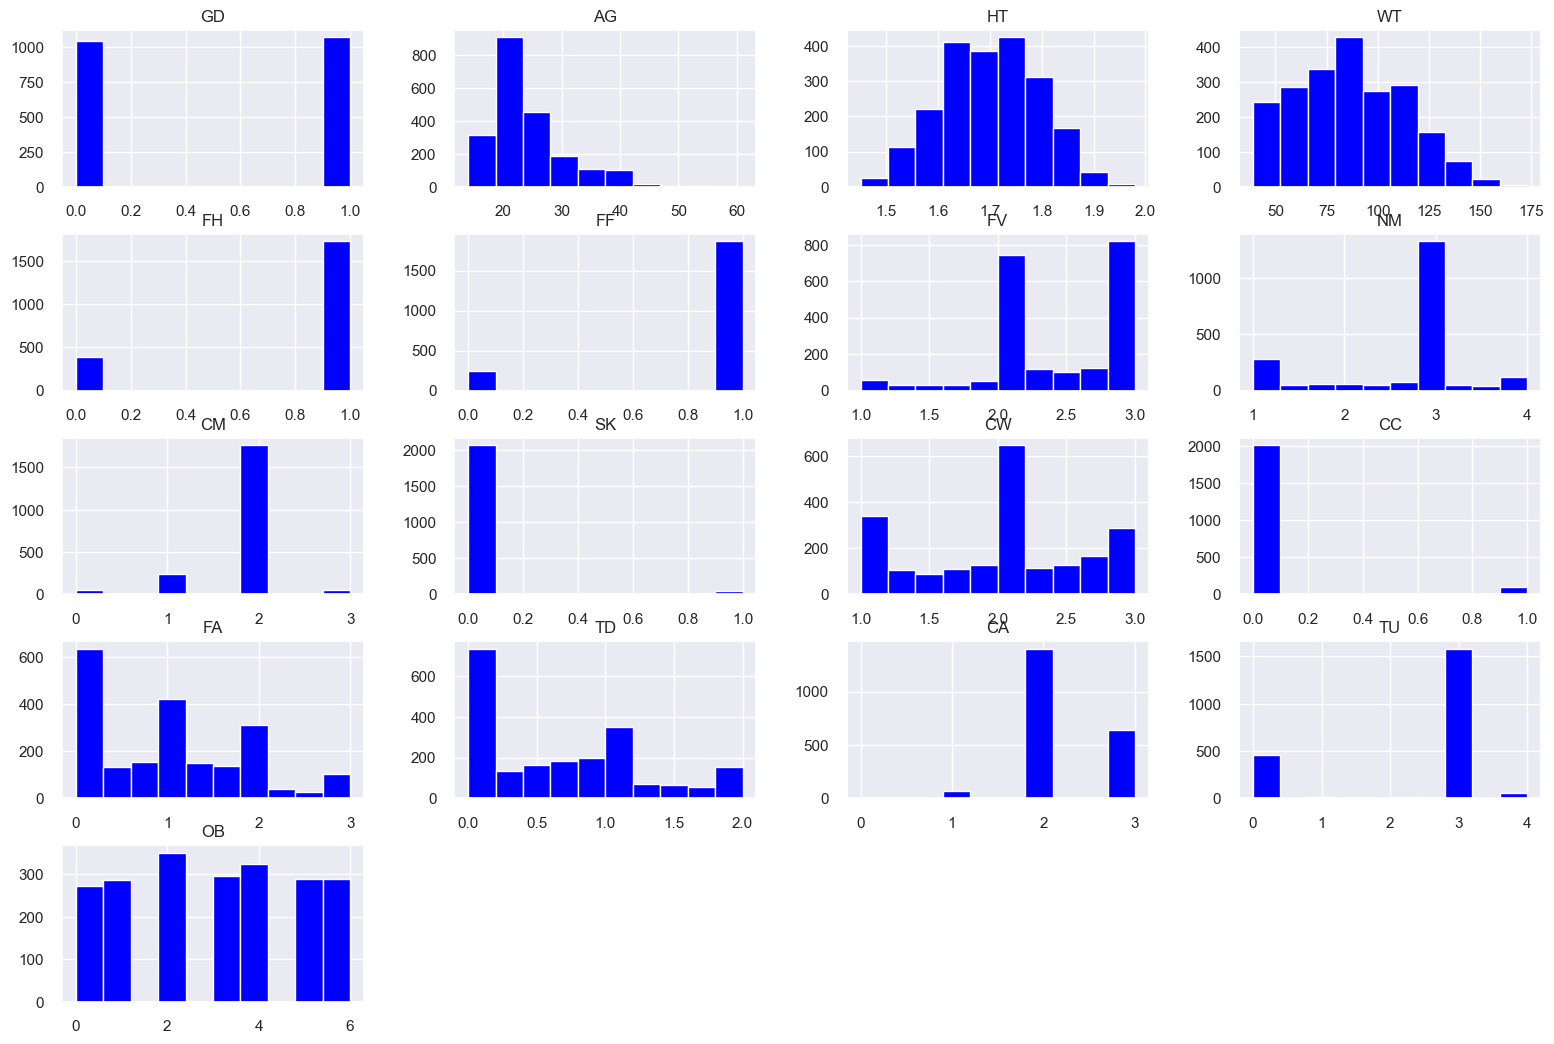

In [475]:
#histogram
data.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

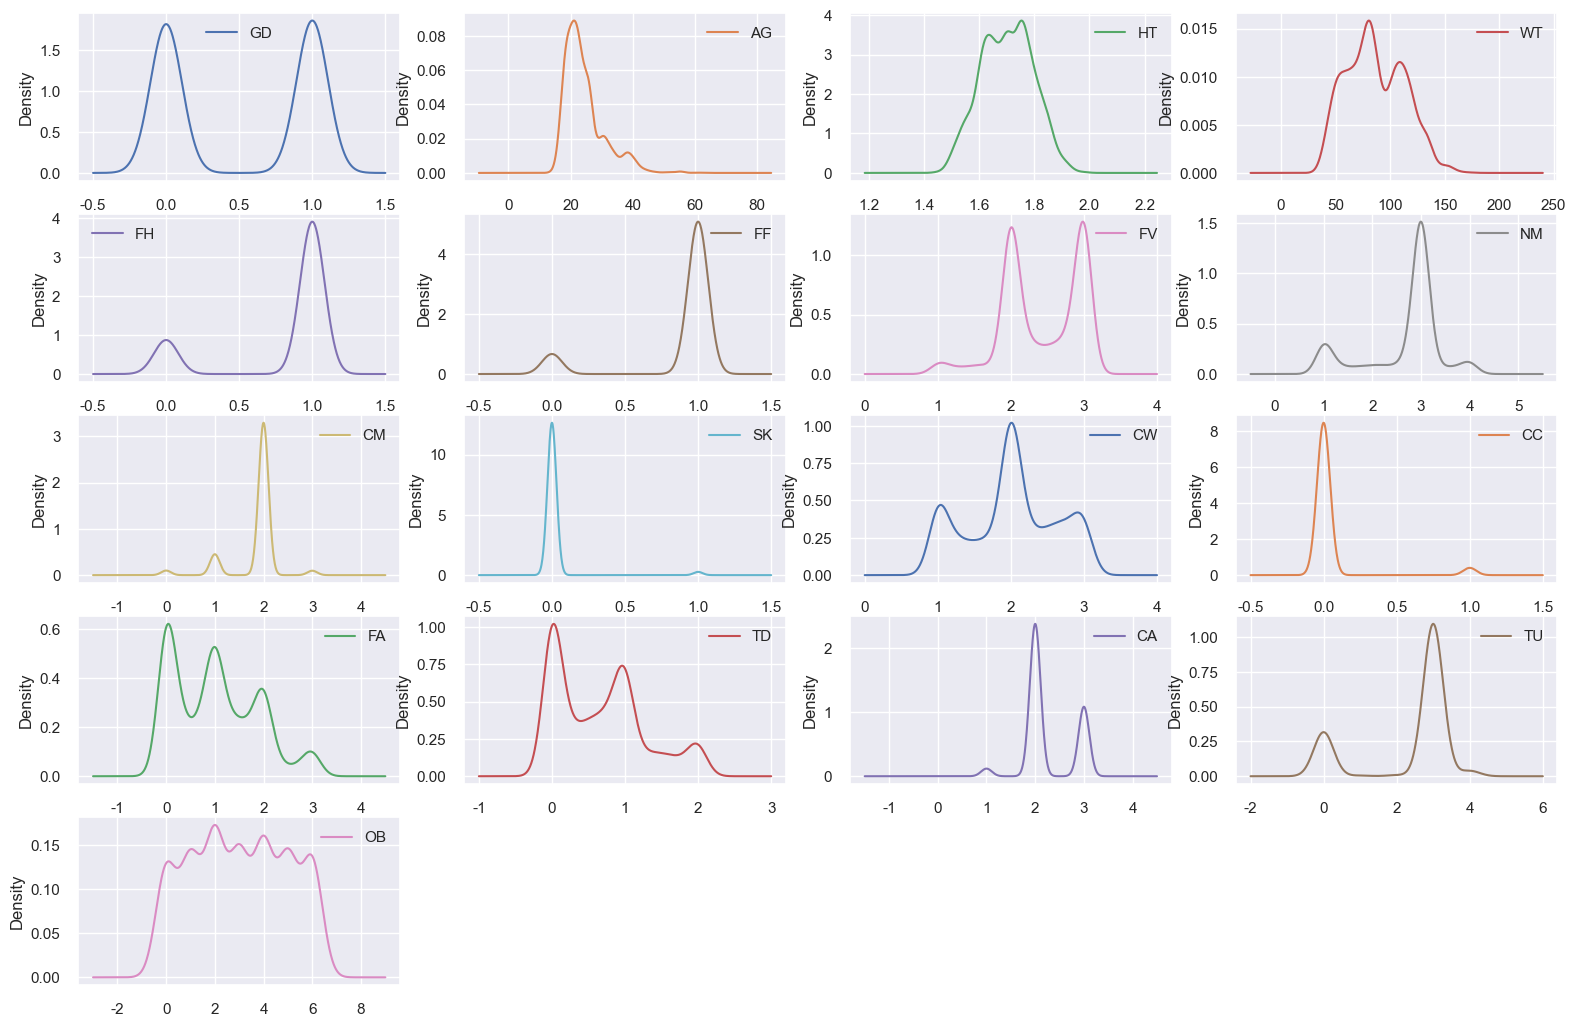

In [476]:
#Boxplot of each column
data.plot( kind='density', figsize=(17,12), subplots=True, layout=(5,4),sharex=False)

plt.show()


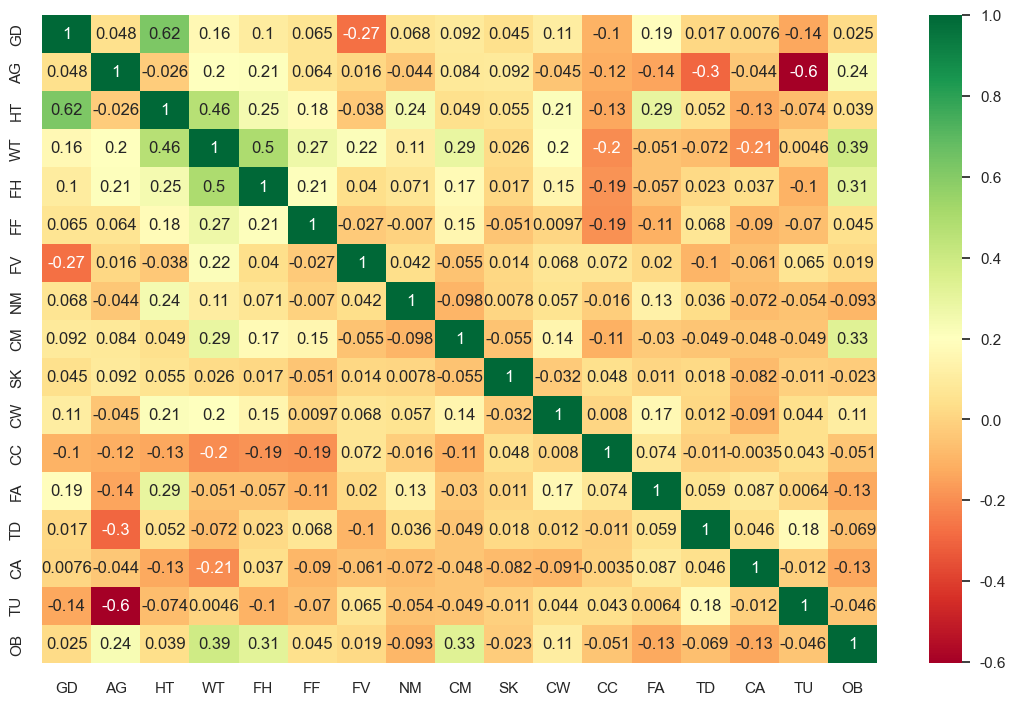

In [477]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Module 4: Data Preprocessing

In [30]:
#checking for the out layers with STD
print("Highest allowed",data['AG'].mean() + 3*data['AG'].std())
print("Lowest allowed",data['AG'].mean() - 3*data['AG'].std())

Highest allowed 43.35050472977086
Lowest allowed 5.274695087377413


In [31]:
#dealing with out layer values
data[(data['AG'] > 35) | (data['AG'] < 5.274)]


GD         AG        HT          WT  FH  FF        FV        NM  CM  SK  \
13     1  41.000000  1.800000   99.000000   0   1  2.000000  3.000000   2   0   
21     0  52.000000  1.690000   87.000000   1   1  3.000000  1.000000   2   1   
33     1  39.000000  1.790000   90.000000   0   0  2.000000  1.000000   2   0   
92     1  55.000000  1.780000   84.000000   1   0  3.000000  4.000000   1   0   
104    0  38.000000  1.560000   80.000000   1   1  2.000000  3.000000   2   0   
...   ..        ...       ...         ...  ..  ..       ...       ...  ..  ..   
1740   1  37.765356  1.763582  117.861590   1   1  2.145114  2.888193   2   0   
1775   1  37.207082  1.762921  118.401740   1   1  2.136830  2.993084   2   0   
1776   1  38.108940  1.752863  119.201465   1   1  2.499388  2.989791   2   0   
1777   1  38.644441  1.768235  117.792268   1   1  2.230742  2.920373   2   0   
1778   1  38.112989  1.766888  118.134898   1   1  2.240757  2.911568   2   0   

            CW  CC        FA       TD  CA  TU  OB  
13    2.000000   0  2.000000  1.00000   1   0   2  
21    2.000000   0  0.000000  0.00000   3   0   2  
33    2.000000   0  0.000000  0.00000   2   3   6  
92    3.000000   1  3.000000  0.00000   1   4   5  
104   2.000000   0  0.000000  0.00000   2   0   2  
...        ...  ..       ...      ...  ..  ..  ..  
1740  2.038128   0  0.852344  0.00000   2   0   3  
1775  1.885926   0  0.615298  0.00000   2   0   3  
1776  1.959777   0  0.608100  0.64676   2   0   3  
1777  1.831187   0  0.756277  0.00000   2   0   3  
1778  1.895876   0  0.822186  0.00000   2   0   3  

[168 rows x 17 columns]

In [32]:
new_df = data[(data['AG'] <35) & (data['AG'] >5.274)]
new_df

GD         AG        HT          WT  FH  FF   FV   NM  CM  SK        CW  \
0      0  21.000000  1.620000   64.000000   1   0  2.0  3.0   2   0  2.000000   
1      0  21.000000  1.520000   56.000000   1   0  3.0  3.0   2   1  3.000000   
2      1  23.000000  1.800000   77.000000   1   0  2.0  3.0   2   0  2.000000   
3      1  27.000000  1.800000   87.000000   0   0  3.0  3.0   2   0  2.000000   
4      1  22.000000  1.780000   89.800000   0   0  2.0  1.0   2   0  2.000000   
...   ..        ...       ...         ...  ..  ..  ...  ...  ..  ..       ...   
2106   0  20.976842  1.710730  131.408528   1   1  3.0  3.0   2   0  1.728139   
2107   0  21.982942  1.748584  133.742943   1   1  3.0  3.0   2   0  2.005130   
2108   0  22.524036  1.752206  133.689352   1   1  3.0  3.0   2   0  2.054193   
2109   0  24.361936  1.739450  133.346641   1   1  3.0  3.0   2   0  2.852339   
2110   0  23.664709  1.738836  133.472641   1   1  3.0  3.0   2   0  2.863513   

      CC        FA        TD  CA  TU  OB  
0      0  0.000000  1.000000   3   3   1  
1      1  3.000000  0.000000   2   3   1  
2      0  2.000000  1.000000   1   3   1  
3      0  2.000000  0.000000   1   4   5  
4      0  0.000000  0.000000   2   3   6  
...   ..       ...       ...  ..  ..  ..  
2106   0  1.676269  0.906247   2   3   4  
2107   0  1.341390  0.599270   2   3   4  
2108   0  1.414209  0.646288   2   3   4  
2109   0  1.139107  0.586035   2   3   4  
2110   0  1.026452  0.714137   2   3   4  

[1940 rows x 17 columns]

In [33]:
#storing the values
upper_limit = data['AG'].mean() + 3*data['AG'].std()
lower_limit = data['AG'].mean() - 3*data['AG'].std()

In [34]:
data['AG'] = np.where(
    data['AG']>upper_limit,
    upper_limit,
    np.where(
        data['AG']<lower_limit,
        lower_limit,
        data['AG']
    )
)

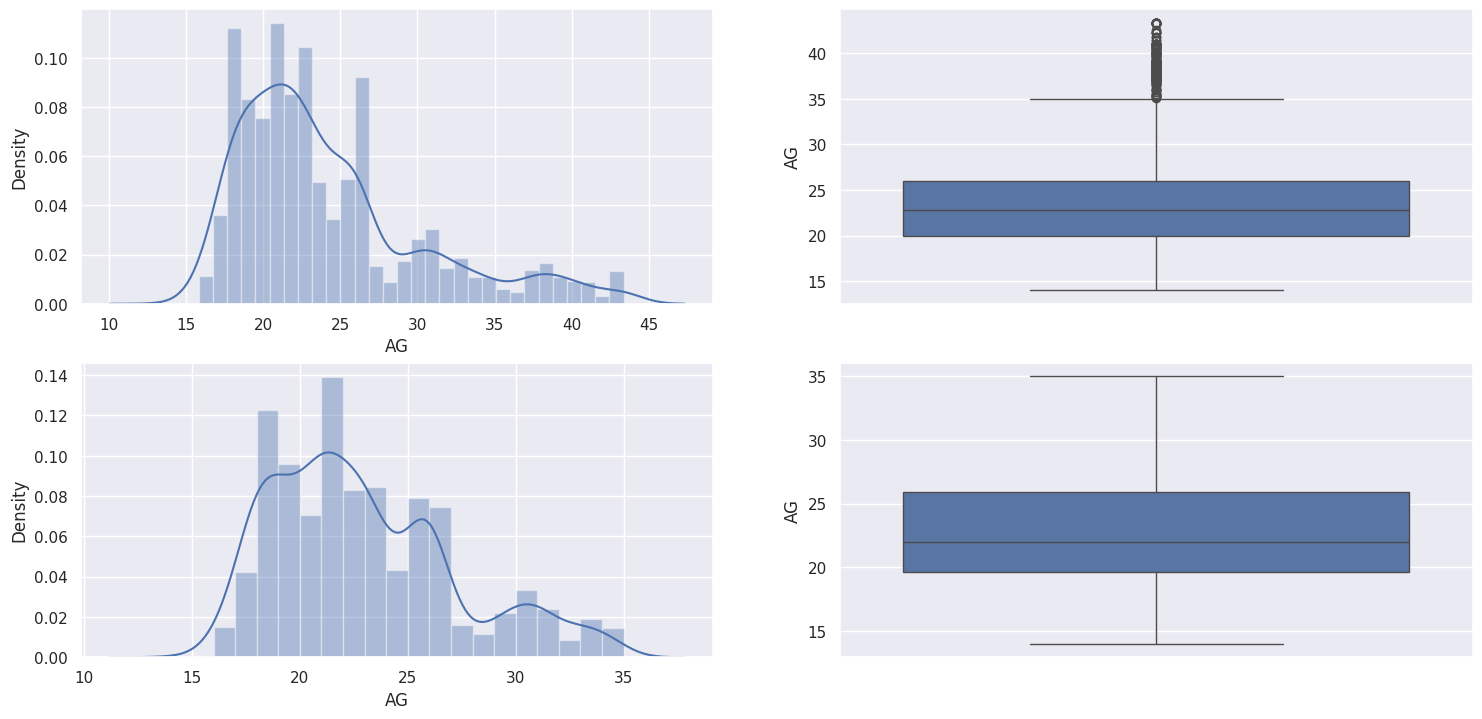

In [35]:
#ploting the outlayer removing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['AG'])
plt.subplot(2,2,2)
sns.boxplot(data['AG'])
plt.subplot(2,2,3)
sns.distplot(new_df['AG'])
plt.subplot(2,2,4)
sns.boxplot(new_df['AG'])
plt.show()

In [36]:
#checking for the out layers with STD
print("Highest allowed",data['NM'].mean() + 3*data['NM'].std())
print("Lowest allowed",data['NM'].mean() - 3*data['NM'].std())

Highest allowed 5.019743996265038
Lowest allowed 0.3515121032138815


In [37]:
#dealing with out layer values
data[(data['NM'] >3.6) | (data['NM'] < 0.351)]

GD         AG        HT          WT  FH  FF        FV        NM  CM  SK  \
18     0  30.000000  1.710000   82.000000   1   1  3.000000  4.000000   1   1   
25     1  20.000000  1.600000   50.000000   1   0  2.000000  4.000000   1   1   
27     0  23.000000  1.600000   52.000000   0   1  2.000000  4.000000   1   0   
30     1  29.000000  1.770000   83.000000   0   1  1.000000  4.000000   1   0   
34     1  22.000000  1.650000   62.000000   0   1  2.000000  4.000000   1   0   
...   ..        ...       ...         ...  ..  ..       ...       ...  ..  ..   
1561   1  31.194458  1.726279  110.714711   1   1  1.794825  3.914454   2   0   
1603   1  24.244029  1.622297   99.982541   1   1  2.941929  3.989492   2   0   
1627   1  40.366238  1.722396  109.349025   1   1  2.281963  3.770379   2   0   
1699   1  39.825592  1.706741  108.012603   1   1  2.487781  3.755976   2   0   
1720   1  30.451174  1.758539  111.950413   1   1  1.067909  3.656401   2   0   

            CW  CC        FA        TD  CA  TU  OB  
18    1.000000   0  0.000000  0.000000   3   0   6  
25    2.000000   0  3.000000  2.000000   3   3   1  
27    2.000000   0  2.000000  1.000000   2   0   1  
30    3.000000   0  0.000000  1.000000   3   2   5  
34    2.000000   0  2.000000  0.000000   2   3   1  
...        ...  ..       ...       ...  ..  ..  ..  
1561  1.972016   0  0.668963  0.000000   3   0   3  
1603  1.014135   0  1.958694  0.687342   3   3   3  
1627  1.000000   0  1.330519  0.000000   3   0   3  
1699  1.000000   0  1.860765  0.000000   3   0   3  
1720  1.984590   0  0.054238  0.000000   2   0   3  

[132 rows x 17 columns]

In [38]:
new_df = data[(data['NM'] <3.6) & (data['NM'] >0.351)]
new_df

GD         AG        HT          WT  FH  FF   FV   NM  CM  SK        CW  \
0      0  21.000000  1.620000   64.000000   1   0  2.0  3.0   2   0  2.000000   
1      0  21.000000  1.520000   56.000000   1   0  3.0  3.0   2   1  3.000000   
2      1  23.000000  1.800000   77.000000   1   0  2.0  3.0   2   0  2.000000   
3      1  27.000000  1.800000   87.000000   0   0  3.0  3.0   2   0  2.000000   
4      1  22.000000  1.780000   89.800000   0   0  2.0  1.0   2   0  2.000000   
...   ..        ...       ...         ...  ..  ..  ...  ...  ..  ..       ...   
2106   0  20.976842  1.710730  131.408528   1   1  3.0  3.0   2   0  1.728139   
2107   0  21.982942  1.748584  133.742943   1   1  3.0  3.0   2   0  2.005130   
2108   0  22.524036  1.752206  133.689352   1   1  3.0  3.0   2   0  2.054193   
2109   0  24.361936  1.739450  133.346641   1   1  3.0  3.0   2   0  2.852339   
2110   0  23.664709  1.738836  133.472641   1   1  3.0  3.0   2   0  2.863513   

      CC        FA        TD  CA  TU  OB  
0      0  0.000000  1.000000   3   3   1  
1      1  3.000000  0.000000   2   3   1  
2      0  2.000000  1.000000   1   3   1  
3      0  2.000000  0.000000   1   4   5  
4      0  0.000000  0.000000   2   3   6  
...   ..       ...       ...  ..  ..  ..  
2106   0  1.676269  0.906247   2   3   4  
2107   0  1.341390  0.599270   2   3   4  
2108   0  1.414209  0.646288   2   3   4  
2109   0  1.139107  0.586035   2   3   4  
2110   0  1.026452  0.714137   2   3   4  

[1979 rows x 17 columns]

In [39]:
#storing the values
upper_limit = data['NM'].mean() + 3*data['NM'].std()
lower_limit = data['NM'].mean() - 3*data['NM'].std()

In [40]:
data['NM'] = np.where(
    data['NM']>upper_limit,
    upper_limit,
    np.where(
        data['NM']<lower_limit,
        lower_limit,
        data['NM']
    )
)

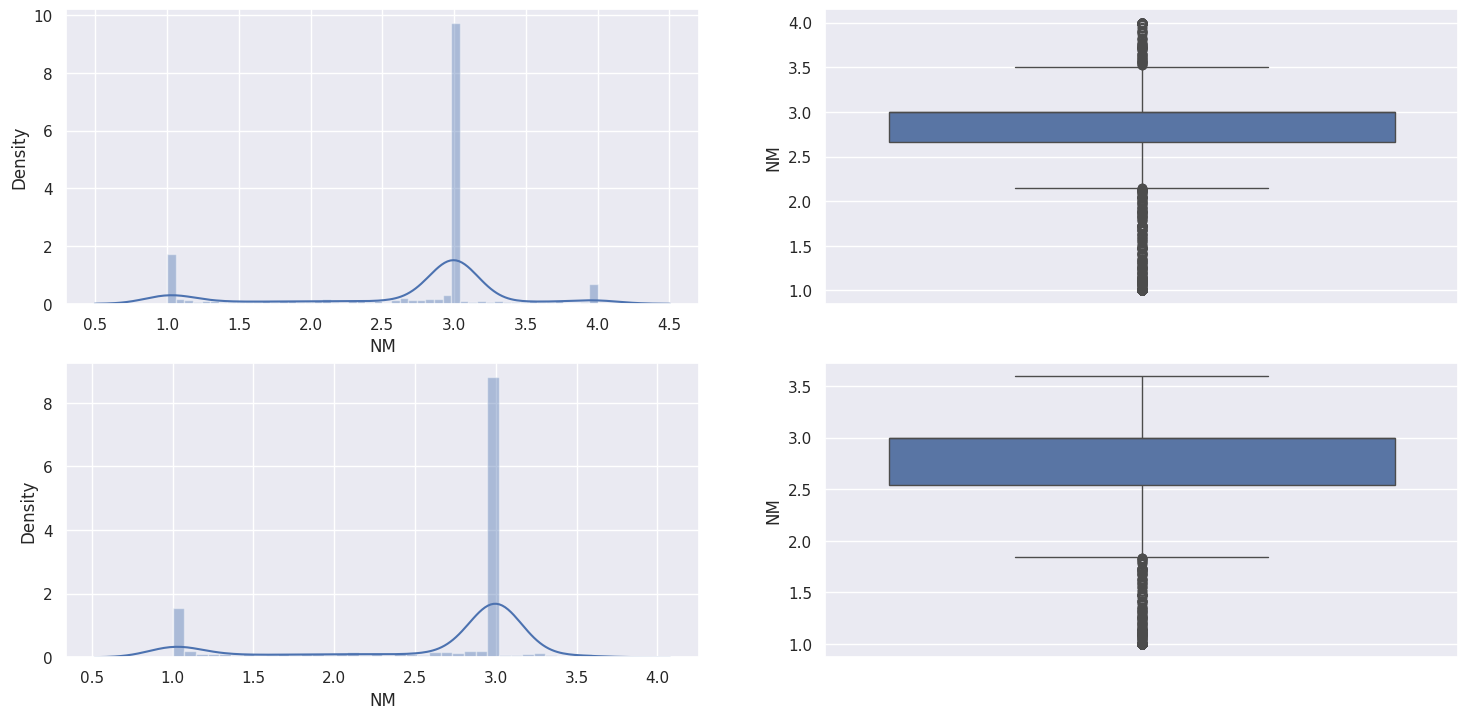

In [41]:
#ploting the outlayer removing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['NM'])
plt.subplot(2,2,2)
sns.boxplot(data['NM'])
plt.subplot(2,2,3)
sns.distplot(new_df['NM'])
plt.subplot(2,2,4)
sns.boxplot(new_df['NM'])
plt.show()

In [42]:
import plotly.graph_objects as go

In [43]:
column_names = data.columns
no_of_boxes = len(column_names)
colors = [ 'hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 360, no_of_boxes)]

fig = go.Figure(data = [go.Box(y = data.loc[:, column_names[i]], marker_color = colors[i], name = column_names[i], boxmean = True, showlegend = True) for i in range(no_of_boxes)])

fig.update_layout(
    xaxis=dict(showgrid = True, zeroline = True, showticklabels = True),
    yaxis=dict(zeroline = True, gridcolor = 'white'),
    paper_bgcolor = 'rgb(233,233,233)',
    plot_bgcolor = 'rgb(233,233,233)')

fig.show()

In [44]:
data.columns

Index(['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC',
       'FA', 'TD', 'CA', 'TU', 'OB'],
      dtype='object')

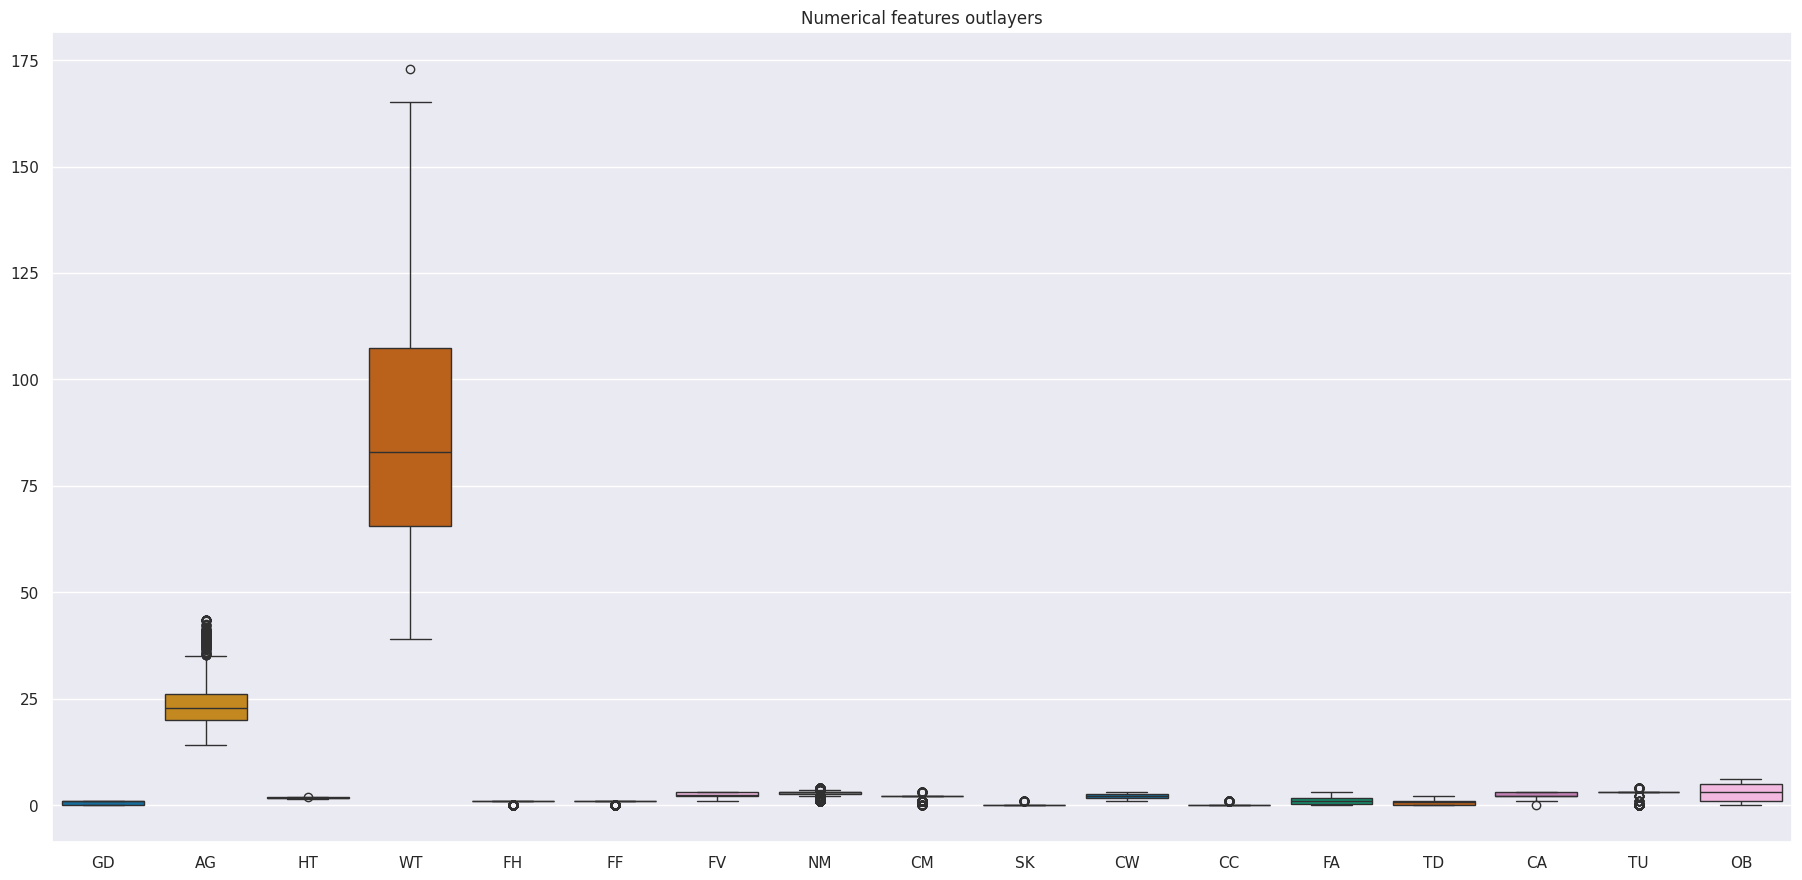

In [45]:
# Plotting boxplots to numeric features
num_var = ['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU', 'OB']
plt.figure(figsize=(20,10))
sns.boxplot(data=data[num_var],
                 palette="colorblind")
plt.title('Numerical features outlayers');

In [46]:
#reading data from pandas
col_names = ['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU', 'OB']
#df = pd.read_csv("Obesity_Dataset.csv", header=1, names=col_names)

<Axes: >

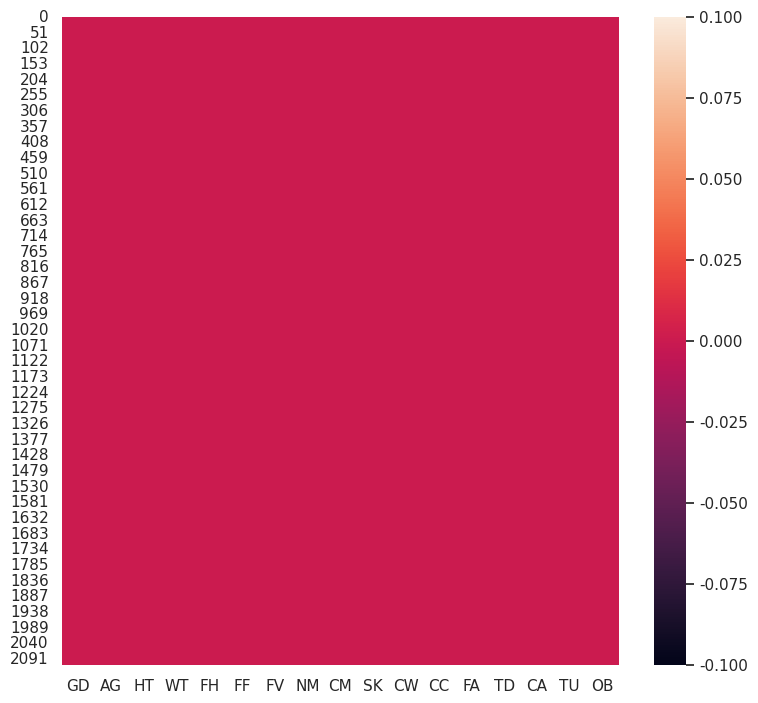

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

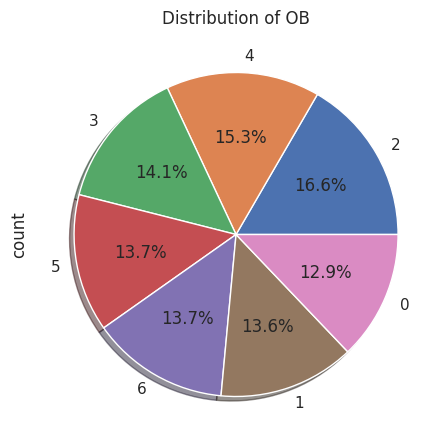

In [48]:
ob_series = pd.Series(data['OB'])
# Plot the pie chart
plt.figure(figsize=(15, 5))
data['OB'].value_counts().plot.pie(explode=None, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of OB')
plt.show()


In [49]:
#check the group by values
data['OB'].value_counts()

OB
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [55]:
# Or customize according to what you'd like to know.

df_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_unique'])

for i in range(0, len(data.columns)):
    df_info.loc[i] = [data.columns[i],
                      data[data.columns[i]].isnull().sum(),
                      data[data.columns[i]].dtypes,
                      data[data.columns[i]].nunique()]

df_info

Name of Col  Num of Null    Dtype  N_unique
0           GD            0    int64         2
1           AG            0  float64      1382
2           HT            0  float64      1574
3           WT            0  float64      1525
4           FH            0    int64         2
5           FF            0    int64         2
6           FV            0  float64       810
7           NM            0  float64       635
8           CM            0    int64         4
9           SK            0    int64         2
10          CW            0  float64      1268
11          CC            0    int64         2
12          FA            0  float64      1190
13          TD            0  float64      1129
14          CA            0    int64         4
15          TU            0    int64         5
16          OB            0    int64         7

In [54]:
df_info = DataFrameSummary(data)
df_info.summary().T

count       mean        std   min        25%       50%         75%  \
GD  2111.0   0.505921   0.500083   0.0        0.0       1.0         1.0   
AG  2111.0  24.249284   6.098189  14.0  19.947192  22.77789        26.0   
HT  2111.0   1.701677   0.093305  1.45       1.63  1.700499    1.768464   
WT  2111.0  86.586058  26.191172  39.0  65.473343      83.0  107.430682   
FH  2111.0   0.817622   0.386247   0.0        1.0       1.0         1.0   
FF  2111.0   0.883941   0.320371   0.0        1.0       1.0         1.0   
FV  2111.0   2.419043   0.533927   1.0        2.0  2.385502         3.0   
NM  2111.0   2.685628   0.778039   1.0   2.658738       3.0         3.0   
CM  2111.0   1.859308   0.468543   0.0        2.0       2.0         2.0   
SK  2111.0   0.020843   0.142893   0.0        0.0       0.0         0.0   
CW  2111.0   2.008011   0.612953   1.0   1.584812       2.0     2.47742   
CC  2111.0   0.045476   0.208395   0.0        0.0       0.0         0.0   
FA  2111.0   1.010298   0.850592   0.0   0.124505       1.0    1.666678   
TD  2111.0   0.657866   0.608927   0.0        0.0   0.62535         1.0   
CA  2111.0   2.268593   0.515498   0.0        2.0       2.0         3.0   
TU  2111.0    2.36523   1.261423   0.0        3.0       3.0         3.0   
OB  2111.0   3.015632    1.95209   0.0        1.0       3.0         5.0   

          max counts uniques missing missing_perc    types  
GD        1.0   2111       2       0           0%     bool  
AG  43.350505   2111    1382       0           0%  numeric  
HT       1.98   2111    1574       0           0%  numeric  
WT      173.0   2111    1525       0           0%  numeric  
FH        1.0   2111       2       0           0%     bool  
FF        1.0   2111       2       0           0%     bool  
FV        3.0   2111     810       0           0%  numeric  
NM        4.0   2111     635       0           0%  numeric  
CM        3.0   2111       4       0           0%  numeric  
SK        1.0   2111       2       0           0%     bool  
CW        3.0   2111    1268       0           0%  numeric  
CC        1.0   2111       2       0           0%     bool  
FA        3.0   2111    1190       0           0%  numeric  
TD        2.0   2111    1129       0           0%  numeric  
CA        3.0   2111       4       0           0%  numeric  
TU        4.0   2111       5       0           0%  numeric  
OB        6.0   2111       7       0           0%  numeric

## Module 5: Model Building-->> Boosting, Bagging, Stacking and Voting

## Data Splitting

In [150]:
classes = ["0", "1","2","3","4","5","6"]
X = data.drop(['OB'],axis=1)
Y = data['OB']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [156]:
data.columns

Index(['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC',
       'FA', 'TD', 'CA', 'TU', 'OB'],
      dtype='object')

In [157]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import itertools
import xgboost as xgb
from sklearn.metrics import confusion_matrix

### Module 5.1: Bagging, Boosting, Voting and Stacking

### Boosting Techniques

In [158]:
# X = np.array(upsampled_df[['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU', 'OB']])
# Y = np.array(upsampled_df.OB.T)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

#### 1. XGB

C:\Users\Shahid Mohammad\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning:

[15:16:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.




              precision    recall  f1-score   support

           0       0.91      0.98      0.94        90
           1       0.89      0.82      0.85        87
           2       0.92      0.94      0.93       103
           3       0.99      0.99      0.99        90
           4       1.00      1.00      1.00       101
           5       0.77      0.78      0.77        81
           6       0.86      0.82      0.84        82

    accuracy                           0.91       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.91      0.91      0.91       634

Accuracy: 0.9085173501577287


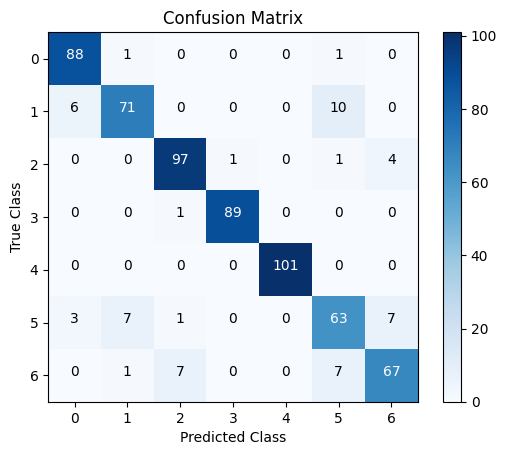

In [165]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt

# # Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Use XGBClassifier instead of XGBR
Model1 = XGBClassifier(
    learning_rate=0.01, n_estimators=100, max_depth=5, min_child_weight=6, gamma=0,
    subsample=0.6, colsample_bytree=0.8, reg_alpha=0.005,
    objective='binary:logistic', nthread=2, scale_pos_weight=1, seed=27
)
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ["0", "1","2","3","4","5","6"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

#### 2. GB

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        90
           1       0.90      0.86      0.88        87
           2       0.88      0.96      0.92       103
           3       0.99      0.99      0.99        90
           4       1.00      1.00      1.00       101
           5       0.83      0.84      0.83        81
           6       0.88      0.80      0.84        82

    accuracy                           0.92       634
   macro avg       0.92      0.91      0.92       634
weighted avg       0.92      0.92      0.92       634

Accuracy: 0.919558359621451


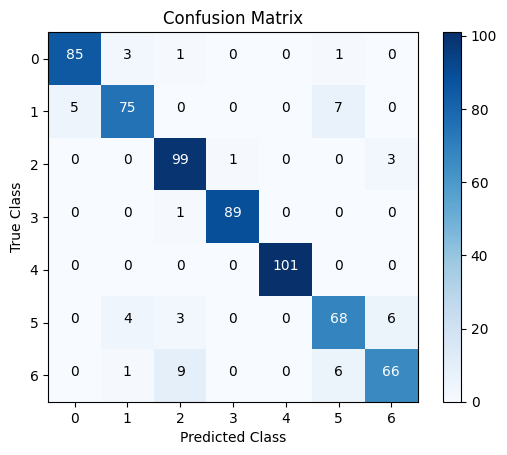

In [171]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the Gradient Boosting classifier
Model2 = GradientBoostingClassifier(random_state=45, learning_rate=0.01, n_estimators=100, max_depth=5)
Model2.fit(X_train, y_train)
y_pred = Model2.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1","2","3","4","5","6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


#### 3. LGBM

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1873
[LightGBM] [Info] Number of data points in the train set: 1477, number of used features: 16
[LightGBM] [Info] Start training from score -2.093762
[LightGBM] [Info] Start training from score -1.999451
[LightGBM] [Info] Start training from score -1.784340
[LightGBM] [Info] Start training from score -1.965049
[LightGBM] [Info] Start training from score -1.890597
[LightGBM] [Info] Start training from score -1.955434
[LightGBM] [Info] Start training from score -1.960230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

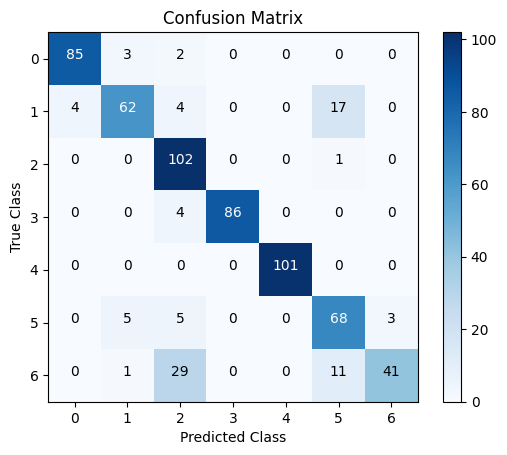

In [175]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the LightGBM classifier
Model3 = LGBMClassifier(random_state=45, learning_rate=0.001, n_estimators=100, max_depth=5)
Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


#### 4. CB

0:	learn: 1.9232508	total: 35.4ms	remaining: 3.51s
1:	learn: 1.9045276	total: 52.9ms	remaining: 2.59s
2:	learn: 1.8832672	total: 67.7ms	remaining: 2.19s
3:	learn: 1.8634665	total: 82.4ms	remaining: 1.98s
4:	learn: 1.8437861	total: 98.1ms	remaining: 1.86s
5:	learn: 1.8232645	total: 114ms	remaining: 1.78s
6:	learn: 1.8034033	total: 131ms	remaining: 1.74s
7:	learn: 1.7835657	total: 146ms	remaining: 1.67s
8:	learn: 1.7656957	total: 160ms	remaining: 1.62s
9:	learn: 1.7493628	total: 175ms	remaining: 1.57s
10:	learn: 1.7329241	total: 190ms	remaining: 1.54s
11:	learn: 1.7174631	total: 207ms	remaining: 1.52s
12:	learn: 1.6983688	total: 225ms	remaining: 1.51s
13:	learn: 1.6833083	total: 243ms	remaining: 1.49s
14:	learn: 1.6682507	total: 263ms	remaining: 1.49s
15:	learn: 1.6529561	total: 287ms	remaining: 1.51s
16:	learn: 1.6387890	total: 308ms	remaining: 1.5s
17:	learn: 1.6240354	total: 329ms	remaining: 1.5s
18:	learn: 1.6094639	total: 348ms	remaining: 1.48s
19:	learn: 1.5937016	total: 366ms	rema

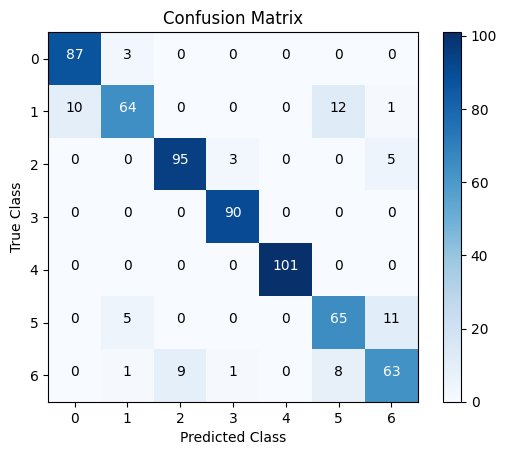

In [207]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model4 = CatBoostClassifier(random_state=45, learning_rate=0.01, n_estimators=100, max_depth=7)
Model4.fit(X_train, y_train)

# Predict on the test set
y_pred = Model4.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


#### 5. ADB

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        90
           1       0.84      0.72      0.78        87
           2       0.67      0.99      0.80       103
           3       0.99      0.96      0.97        90
           4       1.00      1.00      1.00       101
           5       0.73      0.74      0.74        81
           6       0.85      0.56      0.68        82

    accuracy                           0.85       634
   macro avg       0.86      0.83      0.84       634
weighted avg       0.86      0.85      0.84       634

Accuracy: 0.8454258675078864


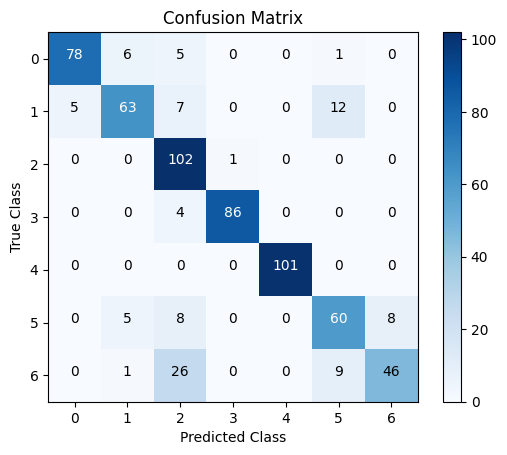

In [210]:
# Create and train the Gradient Boosting classifier
Model5 = GradientBoostingClassifier(random_state=45, learning_rate=0.001, n_estimators=100, max_depth=5)
Model5.fit(X_train, y_train)
y_pred = Model5.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1","2","3","4","5","6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

### ROC Curve

Model 1 - XGBClassifier


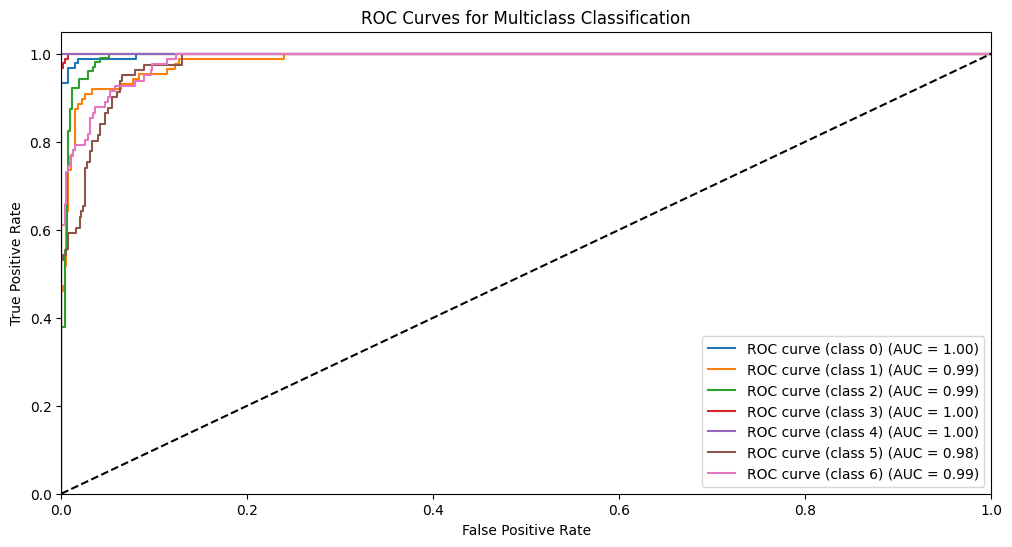

Model 2 - GradientBoostingClassifier


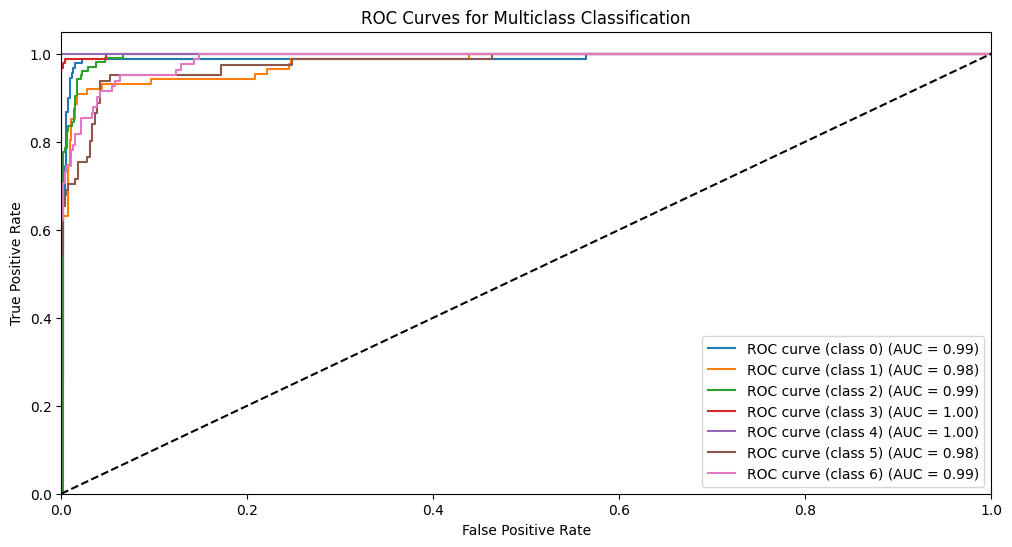

Model 3 - LGBMClassifier
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


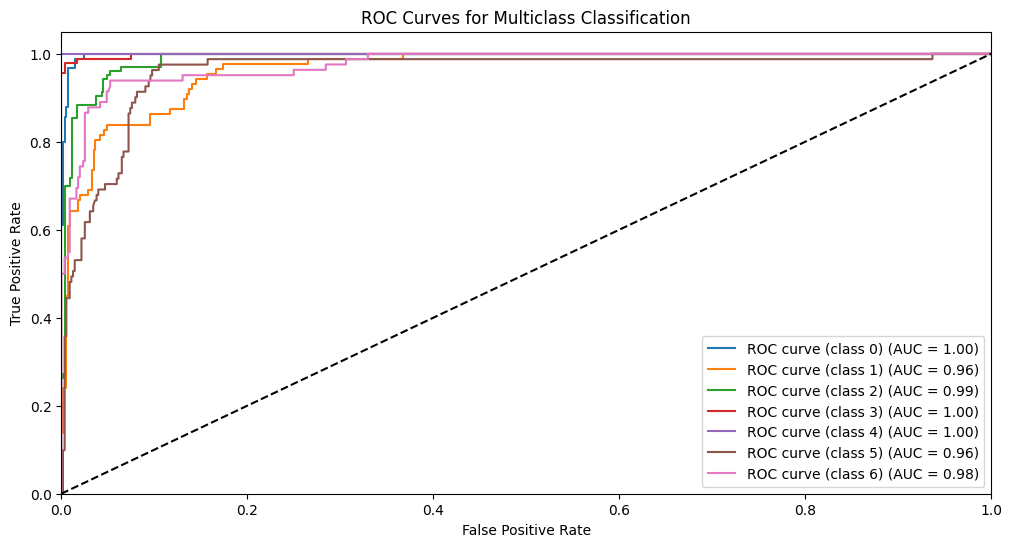

Model 4 - CatBoostClassifier


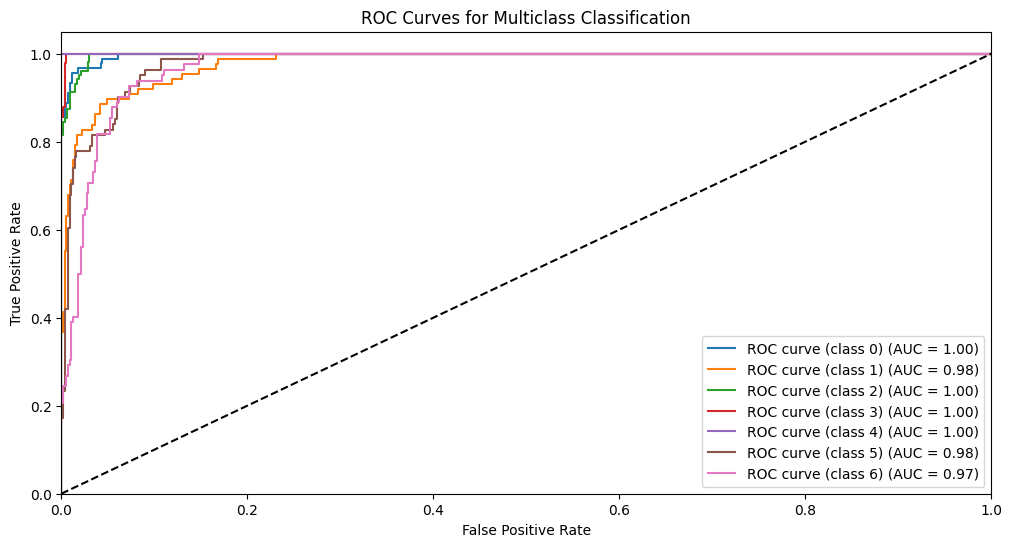

Model 5 - GradientBoostingClassifier


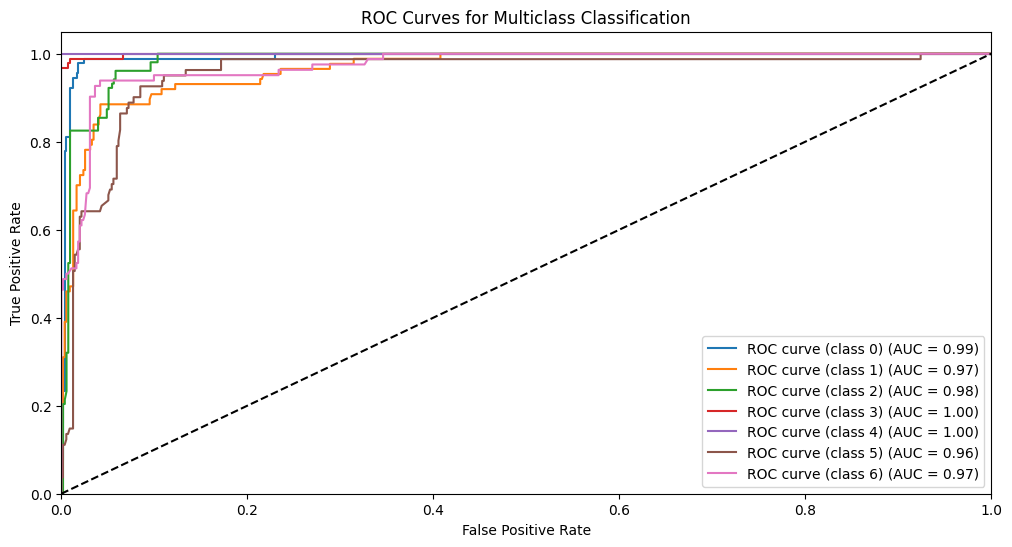

In [214]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
# Create and train the CatBoostClassifier (you can adjust the parameters as needed)

# Define a function to plot ROC curves and calculate ROC AUC scores for multiclass classification
def plot_multiclass_roc(model, X_test, y_test):
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)

    # Initialize empty dictionaries to store ROC AUC values for each class
    roc_auc = {}

    # Initialize dictionaries to store ROC curve values for each class
    fpr = {}
    tpr = {}

    # Convert class labels to a list of unique classes
    classes = np.unique(y_test)

    # Calculate ROC AUC and ROC curves for each class
    for i in range(len(classes)):
        y_true_class_i = (y_test == classes[i]).astype(int)
        y_score_class_i = y_prob[:, i]

        # Calculate ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_true_class_i, y_score_class_i)
        roc_auc[classes[i]] = auc(fpr[i], tpr[i])

    # Plot ROC curves for all classes
    plt.figure(figsize=(12, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(classes[i], roc_auc[classes[i]]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

# Call the function for each model
models = [ Model1, Model2, Model3, Model4, Model5]  # Replace with your model instances
for i, model in enumerate(models):
    print(f"Model {i + 1} - {model.__class__.__name__}")
    plot_multiclass_roc(model, X_test, y_test)


In [215]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

### Bagging Techniques

#### 1. DT

In [216]:
from sklearn.ensemble import BaggingClassifier

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        90
           1       0.75      0.64      0.69        87
           2       0.86      0.86      0.86       103
           3       0.97      0.98      0.97        90
           4       1.00      1.00      1.00       101
           5       0.74      0.79      0.76        81
           6       0.76      0.78      0.77        82

    accuracy                           0.86       634
   macro avg       0.85      0.85      0.85       634
weighted avg       0.86      0.86      0.86       634

Accuracy: 0.8580441640378549


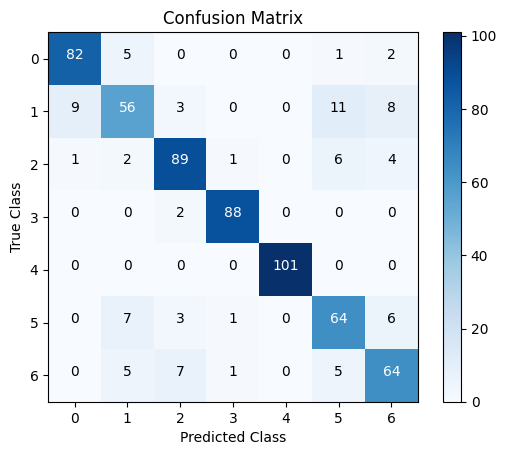

In [227]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model6 = DecisionTreeClassifier(random_state=42, max_features= 0.3)
Model6.fit(X_train, y_train)

# Predict on the test set
y_pred = Model6.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

#### 2. BDT

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        90
           1       0.64      0.93      0.76        87
           2       0.66      0.71      0.68       103
           3       0.87      0.94      0.90        90
           4       0.96      0.99      0.98       101
           5       0.80      0.49      0.61        81
           6       0.67      0.52      0.59        82

    accuracy                           0.78       634
   macro avg       0.78      0.77      0.76       634
weighted avg       0.78      0.78      0.77       634

Accuracy: 0.7760252365930599


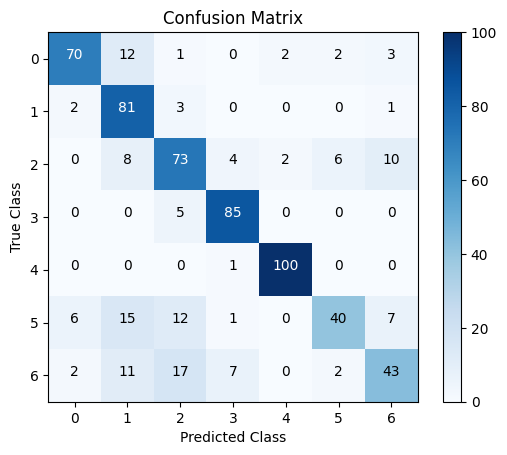

In [230]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model7 = BaggingClassifier( n_estimators=10, random_state=42, max_features= 0.3, max_samples=1.00, n_jobs=-1)
Model7.fit(X_train, y_train)

# Predict on the test set
y_pred = Model7.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

#### 3. RF

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        90
           1       0.72      0.89      0.79        87
           2       0.91      0.93      0.92       103
           3       0.98      1.00      0.99        90
           4       0.99      1.00      1.00       101
           5       0.91      0.78      0.84        81
           6       0.91      0.78      0.84        82

    accuracy                           0.91       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.91      0.91       634

Accuracy: 0.9053627760252366


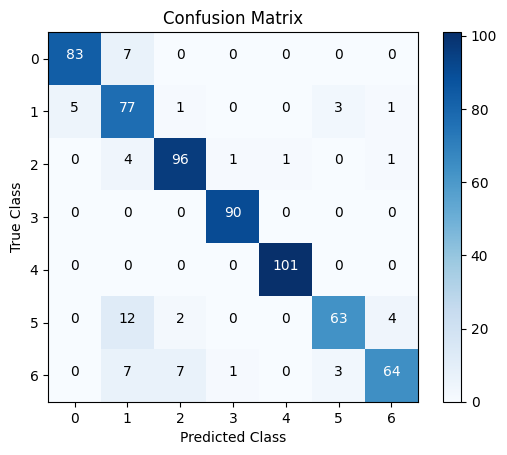

In [254]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model8 = RandomForestClassifier (n_estimators=100, # number of trees
                                 criterion='gini', # metric for impurity reduction
                                 max_depth=None, # maximum depth of tree
                                 min_samples_split=2, # minimum number of samples required to split an internal node
                                 min_samples_leaf=5, # minimum number of samples required to be at a leaf node
                                 max_features=2, # number of features to consider when looking for best split
                                 bootstrap=True, # sample with replacement
                                 random_state=42 # seed for random number generator
                                 )
Model8.fit(X_train, y_train)

# Predict on the test set
y_pred = Model8.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

#### 4. ET

In [268]:
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        90
           1       0.76      0.85      0.80        87
           2       0.91      0.96      0.93       103
           3       0.97      1.00      0.98        90
           4       1.00      1.00      1.00       101
           5       0.88      0.73      0.80        81
           6       0.85      0.82      0.83        82

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634

Accuracy: 0.9037854889589906


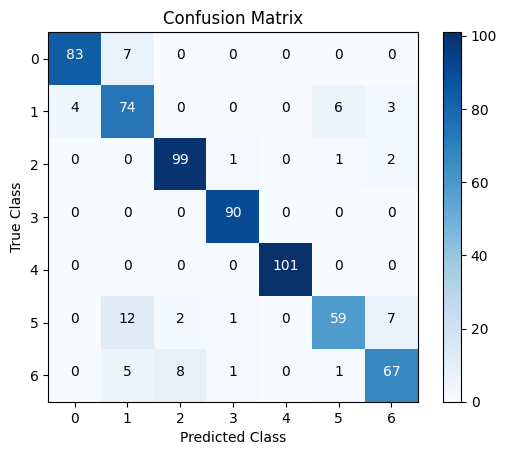

In [269]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model9 = ExtraTreesClassifier (n_estimators=100,  # Number of trees in the forest
                                    criterion='gini',      # Impurity function to measure the quality of a split
                                    max_depth=1000,            # Maximum depth of the tree
                                    min_samples_split=10,       # Minimum number of samples required to split an internal node
                                    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
                                    max_features=3,      # Number of features to consider when looking for the best split
                                    bootstrap=2,            # Whether bootstrap samples are used when building trees
                                    random_state=42                 # Seed used by the random number generator
                                    )
Model9.fit(X_train, y_train)

# Predict on the test set
y_pred = Model9.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

#### 5. BME

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        90
           1       0.68      0.77      0.72        87
           2       0.83      0.91      0.87       103
           3       0.85      0.99      0.91        90
           4       0.98      1.00      0.99       101
           5       0.87      0.68      0.76        81
           6       0.86      0.66      0.74        82

    accuracy                           0.85       634
   macro avg       0.86      0.85      0.85       634
weighted avg       0.86      0.85      0.85       634

Accuracy: 0.8548895899053628


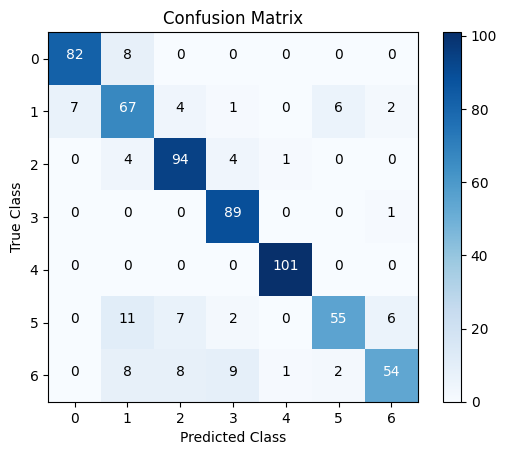

In [275]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model10 = ExtraTreesClassifier (n_estimators=100,  # Number of trees in the forest
                                    criterion='gini',      # Impurity function to measure the quality of a split
                                    max_depth=1000,            # Maximum depth of the tree
                                    min_samples_split=10,       # Minimum number of samples required to split an internal node
                                    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
                                    max_features=1,      # Number of features to consider when looking for the best split
                                    bootstrap=2,            # Whether bootstrap samples are used when building trees
                                    random_state=42                 # Seed used by the random number generator
                                    )
Model10.fit(X_train, y_train)

# Predict on the test set
y_pred = Model10.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

#### ROC Curve

Model 1 - RandomForestClassifier


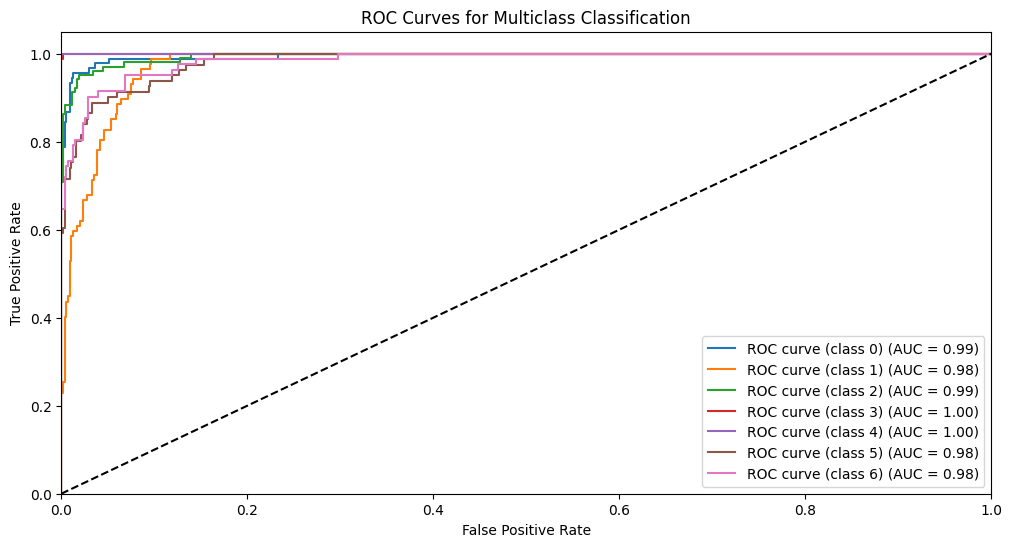

Model 2 - ExtraTreesClassifier


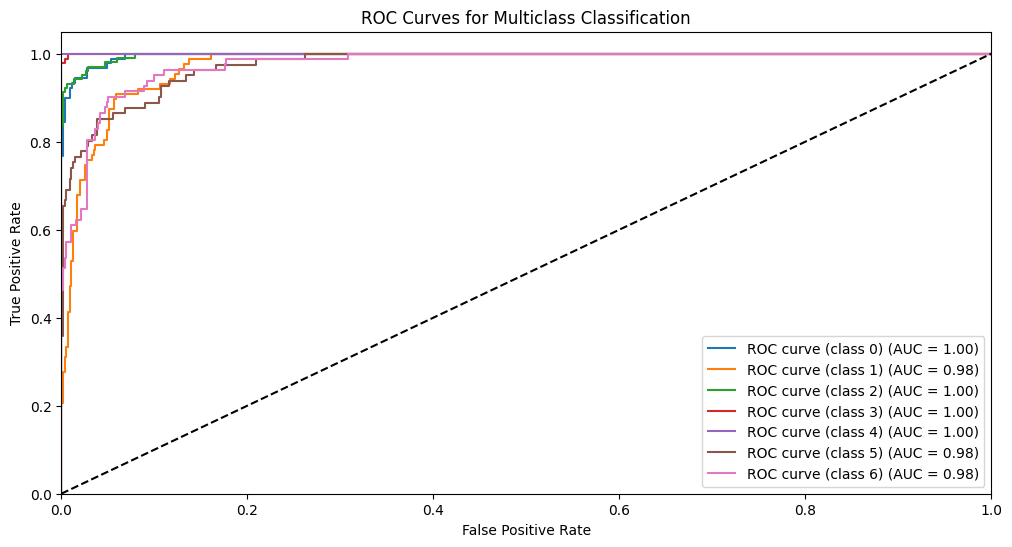

Model 3 - RandomForestClassifier


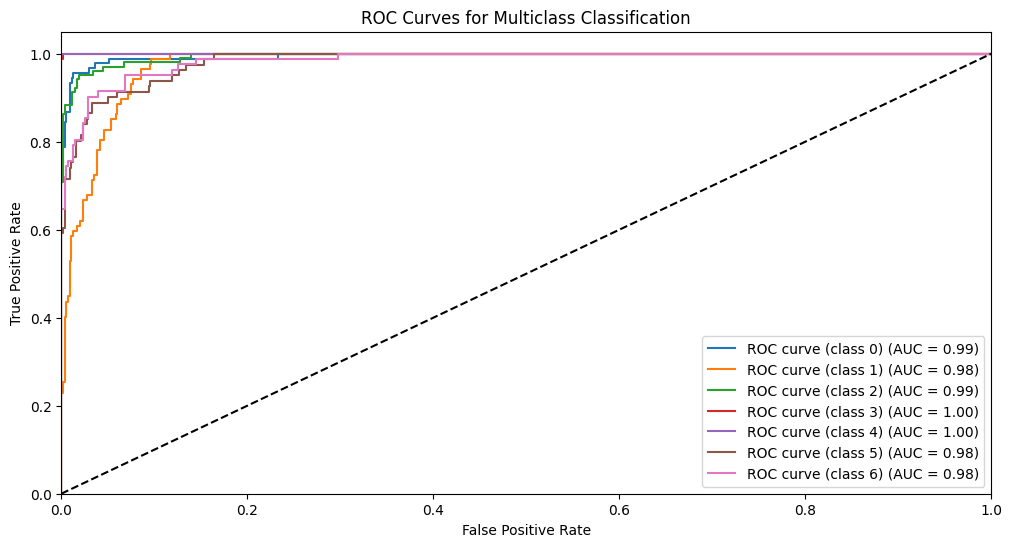

Model 4 - ExtraTreesClassifier


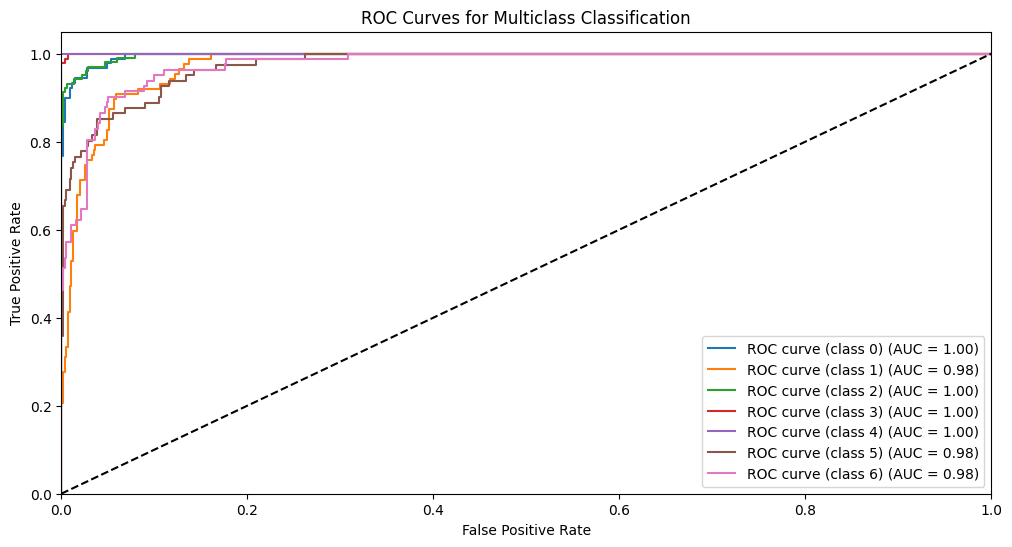

Model 5 - ExtraTreesClassifier


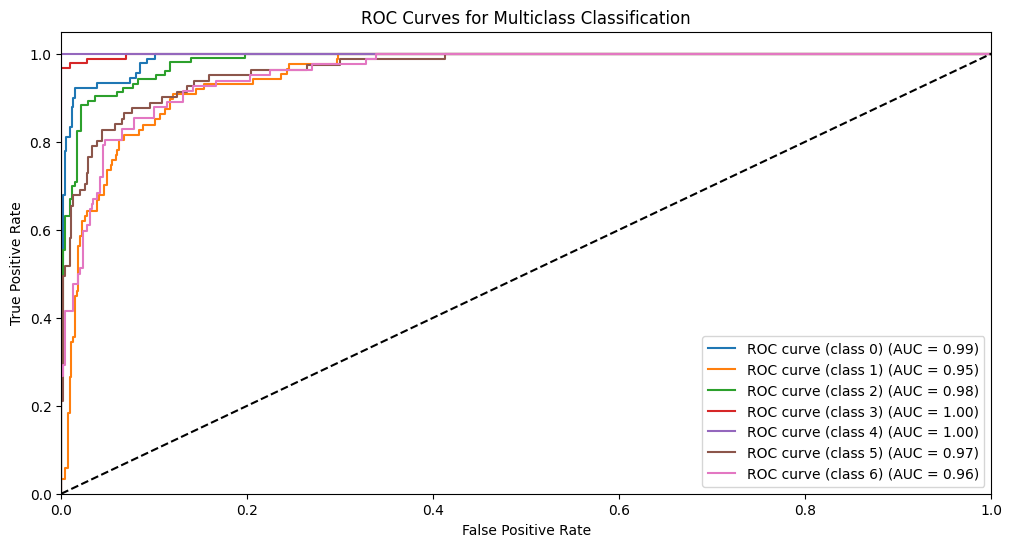

In [278]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
# Create and train the CatBoostClassifier (you can adjust the parameters as needed)

# Define a function to plot ROC curves and calculate ROC AUC scores for multiclass classification
def plot_multiclass_roc(model, X_test, y_test):
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)

    # Initialize empty dictionaries to store ROC AUC values for each class
    roc_auc = {}

    # Initialize dictionaries to store ROC curve values for each class
    fpr = {}
    tpr = {}

    # Convert class labels to a list of unique classes
    classes = np.unique(y_test)

    # Calculate ROC AUC and ROC curves for each class
    for i in range(len(classes)):
        y_true_class_i = (y_test == classes[i]).astype(int)
        y_score_class_i = y_prob[:, i]

        # Calculate ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_true_class_i, y_score_class_i)
        roc_auc[classes[i]] = auc(fpr[i], tpr[i])

    # Plot ROC curves for all classes
    plt.figure(figsize=(12, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(classes[i], roc_auc[classes[i]]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

# Call the function for each model
models = [ Model6, Model7, Model8, Model9, Model10]  # Replace with your model instances
for i, model in enumerate(models):
    print(f"Model {i + 1} - {model.__class__.__name__}")
    plot_multiclass_roc(model, X_test, y_test)


### Voting Model

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [297]:
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

knn = KNeighborsClassifier()
estimators.append(('Knn', knn))

mlp = MLPClassifier()
estimators.append(('NN', mlp))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

nb = GaussianNB()
estimators.append(('NB', nb))

voting1 = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(solver='liblinear')),
                             ('Knn', KNeighborsClassifier()),
                             ('NN', MLPClassifier()), ('SVM', SVC()),
                             ('NB', GaussianNB())])

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86        90
           1       0.70      0.49      0.58        87
           2       0.80      0.87      0.84       103
           3       0.90      1.00      0.95        90
           4       1.00      1.00      1.00       101
           5       0.72      0.74      0.73        81
           6       0.78      0.56      0.65        82

    accuracy                           0.82       634
   macro avg       0.81      0.81      0.80       634
weighted avg       0.81      0.82      0.81       634

Accuracy: 0.8186119873817035


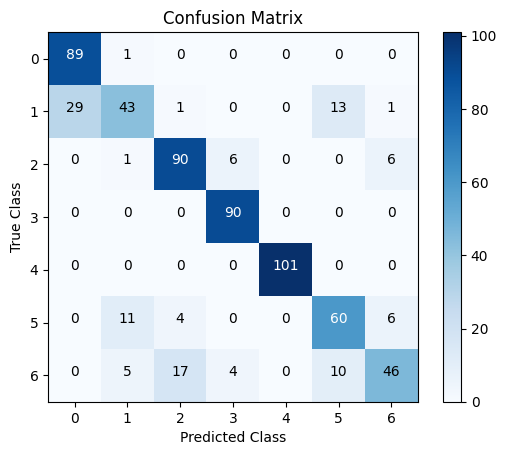

In [298]:
Model11 = voting1
Model11.fit(X_train, y_train)

# Predict on the test set
y_pred = Model11.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

### Stacking Model

In [299]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [302]:
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

knn = KNeighborsClassifier()
estimators.append(('Knn', knn))

mlp = MLPClassifier()
estimators.append(('NN', mlp))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

nb = GaussianNB()
estimators.append(('NB', nb))

stacking = StackingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(solver='liblinear')),
                             ('Knn', KNeighborsClassifier()),
                             ('NN', MLPClassifier()), ('SVM', SVC()),
                             ('NB', GaussianNB())])

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\Shahid 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        90
           1       0.82      0.69      0.75        87
           2       0.90      0.97      0.93       103
           3       0.98      0.99      0.98        90
           4       1.00      1.00      1.00       101
           5       0.85      0.84      0.84        81
           6       0.91      0.83      0.87        82

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634

Accuracy: 0.9037854889589906


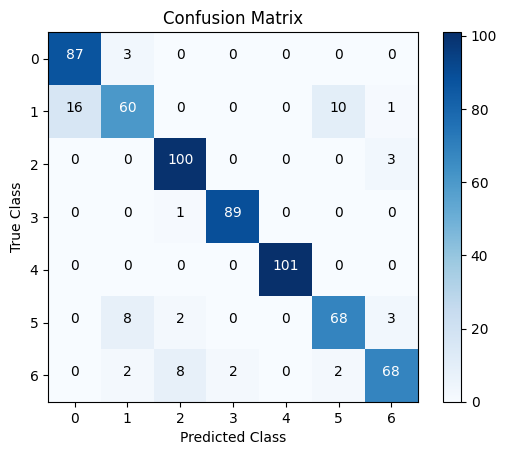

In [303]:
Model12 = stacking
Model12.fit(X_train, y_train)

# Predict on the test set
y_pred = Model12.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [4]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence  # newly learnt this time!

#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef

#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm


plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
sns.set(font_scale = 1)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

print("Let's start!")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Let's start!


## PyCaret Pakage

In [73]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'OB', session_id = 123)

### Module 5.2: Creating Meta Learners for Stacking

In [391]:
meta_learner1 = stack_models(estimator_list = [et, rf, gbc, xgboost], meta_model = SVC())# Define meta learner

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [393]:
evaluate_model(meta_learner1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [392]:
meta_learner2 = stack_models(estimator_list = [et, rf, gbc, xgboost], meta_model = GaussianNB())# Define meta learner

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [394]:
evaluate_model(meta_learner2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Module 6: Proposed Models

### Module 6.1: Building Proposed Stacking Model

In [421]:
Stacking = stack_models(estimator_list = [et, rf, gbc, xgboost], meta_model = LogisticRegression())# Define meta learner

In [422]:
evaluate_model(Stacking)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Module 6.2: Building Proposed Voting Model

In [419]:
Voting = blend_models(estimator_list =[lr, et, rf, gbc, xgboost],  method = 'soft')

In [423]:
evaluate_model(Voting)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Module 7: SHAP and LIME Analysis for Proposed Stacking and Voting Models 

## SHAP Analysis

In [178]:
import shap
shap.initjs()

#### Module 7.1: SHAP for Proposed Stacking Model

In [179]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(Stacking.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 635it [10:13,  1.02it/s]


In [180]:
np.shape(shap_values.values)

(634, 16)

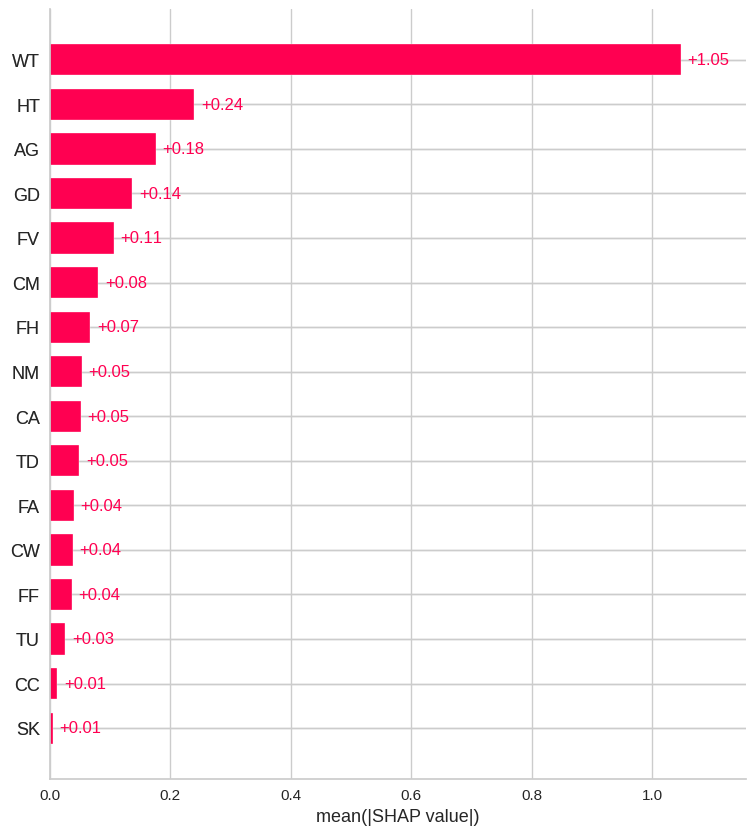

In [165]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

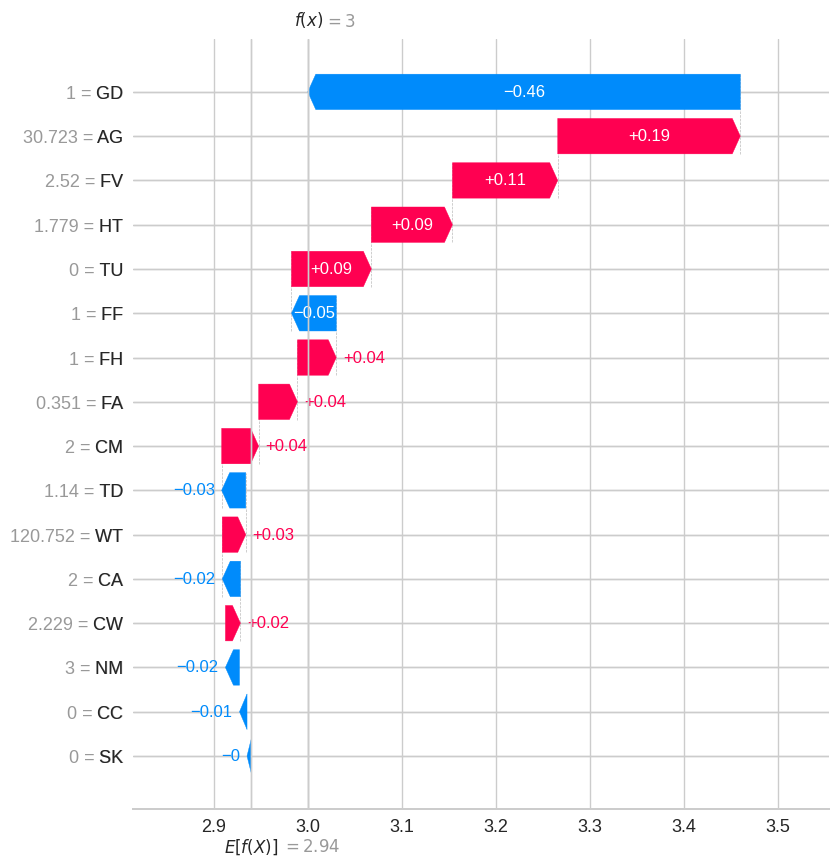

In [153]:
shap.plots.waterfall(shap_values[4], max_display=len(shap_values.feature_names))

#### Module 7.2: SHAP for Proposed Voting Model

In [162]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(Voting.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 635it [05:10,  2.00it/s]


In [163]:
np.shape(shap_values.values)

(634, 16)

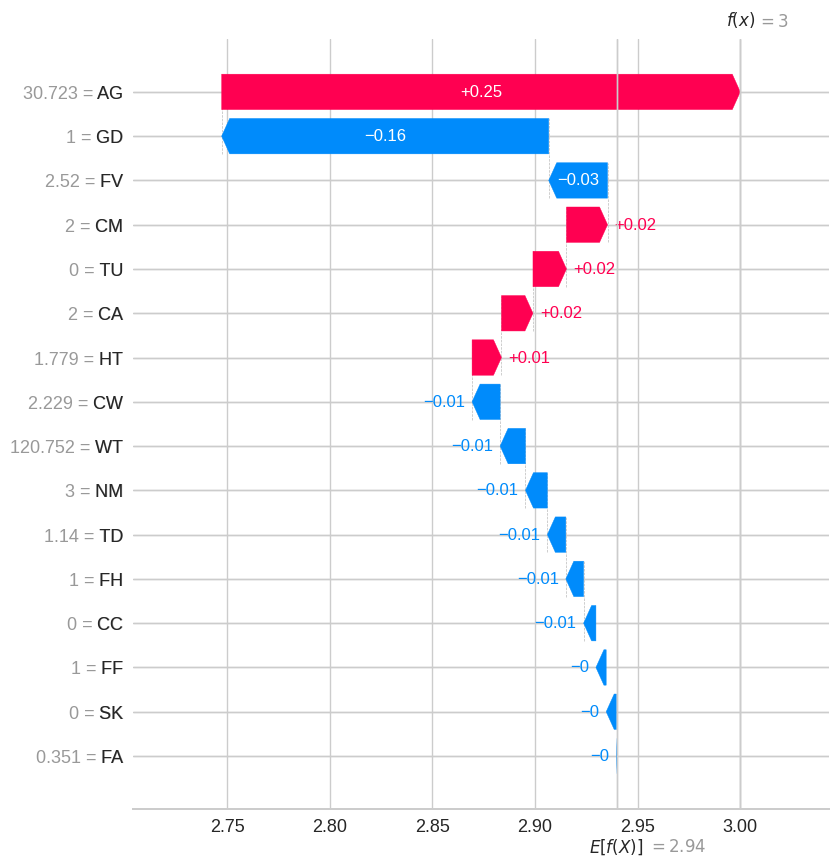

In [164]:
shap.plots.waterfall(shap_values[4], max_display=len(shap_values.feature_names))

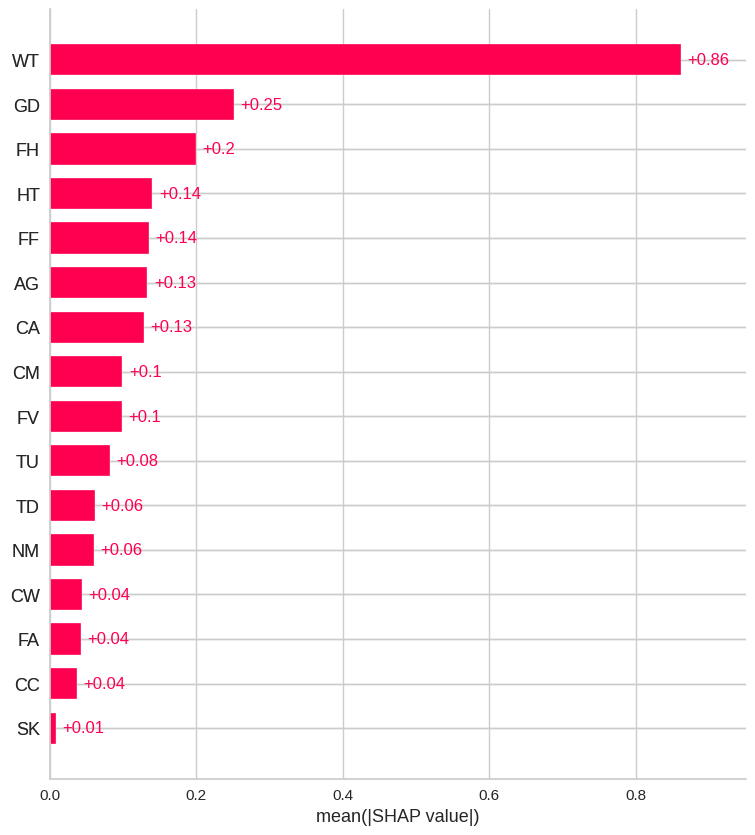

In [154]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

## LIME Analysis

In [186]:
#!pip install lime

import lime
import lime.lime_tabular

In [187]:
# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,  # Use the NumPy array representation of X
    feature_names=X.columns.tolist(), # Feature names for interpretability
    class_names=['0','1', '2','3','4', '5','6'], # Class names
    mode='classification' # or 'regression' depending on the task
)

In [188]:
# Choose an instance to explain
instance_index = 4 # Example: explain the first instance
instance = X.iloc[instance_index]

#### Module 7.3: LIME for Proposed Stacking Model

In [189]:
# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: Stacking.predict_proba(pd.DataFrame(x, columns=X.columns)), # Use a lambda function to wrap the prediction
    num_features=16  # Number of features to show in explanation
)

In [190]:
# Show the explanation
explanation.show_in_notebook(show_table=True)

In [192]:
explanation.as_list()

[('83.00 < WT <= 107.43', -0.19724604294281295),
 ('CC <= 0.00', 0.05497194095205371),
 ('HT > 1.77', 0.05007124155544762),
 ('0.00 < GD <= 1.00', 0.0407542382310369),
 ('CM <= 2.00', 0.03469046276611924),
 ('TU <= 3.00', -0.025977717088788217),
 ('FV <= 2.00', 0.024865013879214335),
 ('1.58 < CW <= 2.00', 0.01494374792646707),
 ('SK <= 0.00', -0.013958884171791378),
 ('NM <= 2.66', 0.010950330823172764),
 ('CA <= 2.00', 0.008441386679373155),
 ('19.95 < AG <= 22.78', -0.00800471591550372),
 ('TD <= 0.00', -0.0044683728137915),
 ('FA <= 0.12', -0.003847794681592439),
 ('FH <= 1.00', 0.0),
 ('FF <= 1.00', 0.0)]

#### Module 7.4: LIME for Proposed Voting Model

In [193]:
# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: voting.predict_proba(pd.DataFrame(x, columns=X.columns)), # Use a lambda function to wrap the prediction
    num_features=16  # Number of features to show in explanation
)

In [194]:
# Show the explanation
explanation.show_in_notebook(show_table=True)

In [195]:
explanation.as_list()

[('83.00 < WT <= 107.43', -0.1813035092049366),
 ('HT > 1.77', 0.10927335554876667),
 ('SK <= 0.00', 0.038771220072077325),
 ('TD <= 0.00', 0.032743807094365904),
 ('FV <= 2.00', 0.028133125119988476),
 ('CM <= 2.00', -0.02398617607638212),
 ('FA <= 0.12', -0.022261127857379073),
 ('0.00 < GD <= 1.00', 0.019296214198719425),
 ('TU <= 3.00', -0.018762207667197054),
 ('CC <= 0.00', 0.008801503758719876),
 ('CA <= 2.00', -0.008544240192221428),
 ('19.95 < AG <= 22.78', 0.0075252652985401194),
 ('NM <= 2.66', 0.005530790126758581),
 ('1.58 < CW <= 2.00', 0.004102256245693154),
 ('FH <= 1.00', 0.0),
 ('FF <= 1.00', 0.0)]

## End of the Experiment